# Projet Velib - Analyse de données - Notebook R

JULIA Manon, MARAIS Mathilde, PIOT Damien 


Ce projet en Analyse de données à pour objectif d'étudier un jeu de données sur les chargements des stations de Velib dans la ville de Paris sur une période d'une semaine entre le 2 et le 7 septembre. 

Un premier jeu de données contient les taux de chargements des stations de distribution des vélos. 
* Un taux de chargement à 0 indique que la station est vide et qu'aucun vélo n'est disponible. 
* Un taux de chargement à 1 indique que la station est pleine et que tous les vélos qu'elle peut contenir sont disponibles. 

Un second jeu de données contient les coordonnées (logitude et latitude) associées à chaque station, ainsi qu'un élément Bonus.
* Un bonus à 1 signifie que la station est au sommet d'une colline ou se trouve sur un relief particulier. 
* Un bonus à 0 signifie que la station se situe au niveau du référentiel sur le plan de l'altitude. 

Du point de vue de l'analyse de données, les individus étudiés sont les stations. Il y a 168 variables qui correspondent aux 168 heures d'une semaine. 




# I- Etude descriptive du jeu de données

## Ouverture et étude des jeux de données

Nous allons importer les packages dont nous allons nous servir dans ce Notebook. Ils sont tous regroupés dans la cellule ci-contre.

In [1]:
#rm(list = ls())   # erase everything, start from scratch!


In [2]:
library(ggplot2)
library(reshape2)
library(gridExtra)
library(readr)
library(viridis)

Le chargement a nécessité le package : viridisLite



Nous allons maintenant charger notre jeu de données.

In [3]:
# direct loading from stored data on PLMlab
load('data/velib.RData')
summary(velib)

# alternative: load the data from package funFEM, where you have more information (help page)
# library(funFEM)
# data(velib)
# help("velib")

         Length Class      Mode     
data      181   data.frame list     
position    2   data.frame list     
dates     181   -none-     character
bonus    1189   -none-     numeric  
names    1189   -none-     character

### Visualisation

Dans un premier temps, nous allons ouvrir et visualiser les premières lignes de nos deux dataset. L'objectif est d'avoir un apperçu de nos jeux de données, avec leurs tailles, variables et individus étudiés.

In [4]:
# data preparation
loading = as.matrix(velib$data)
colnames(loading) = 1:ncol(loading)
rownames(loading) = velib$names

stations = 1:nrow(loading)
coord = velib$position[stations,]
coord$bonus = velib$bonus[stations]
coord$names = velib$names[stations]

# select exactly 7 days of data (we remove the first 13 dates)
dates = 14:181
loading = loading[stations, dates]
colnames(loading) = 1:length(dates)

head(loading)
head(coord)

,1,2,3,4,5,6,7,8,9,10,⋯,159,160,161,162,163,164,165,166,167,168
EURYALE DEHAYNIN,0.03846154,0.03846154,0.07692308,0.03846154,0.03846154,0.03846154,0.03846154,0.03846154,0.10714286,0.00000000,⋯,0.29629630,0.11111111,0.1111111,0.14814815,0.30769231,0.07692308,0.11538462,0.07692308,0.1538462,0.1538462
LEMERCIER,0.47826087,0.47826087,0.47826087,0.43478261,0.43478261,0.43478261,0.43478261,0.43478261,0.26086957,0.04347826,⋯,0.04347826,0.00000000,0.2173913,0.13043478,0.04545455,0.17391304,0.17391304,0.17391304,0.2608696,0.3913043
MEZIERES RENNES,0.21818182,0.14545455,0.12727273,0.10909091,0.10909091,0.10909091,0.09090909,0.09090909,0.05454545,0.10909091,⋯,0.25925926,0.25925926,0.2037037,0.12962963,0.14814815,0.29629630,0.31481481,0.37037037,0.3703704,0.4074074
FARMAN,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,1.00000000,1.00000000,1.00000000,⋯,1.00000000,1.00000000,0.9047619,0.85714286,0.85714286,0.85714286,0.76190476,0.76190476,0.7619048,0.7619048
QUAI DE LA RAPEE,0.92753623,0.81159420,0.73913043,0.72463768,0.72463768,0.72463768,0.72463768,0.72463768,0.75362319,0.97101449,⋯,0.22727273,0.45454545,0.5909091,0.83333333,1.00000000,0.81818182,0.63636364,0.71212121,0.6212121,0.5757576
CHOISY POINT D'IVRY,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.08333333,0.00000000,⋯,0.34782609,0.08695652,0.1153846,0.08695652,0.13043478,0.08695652,0.08695652,0.43478261,0.3913043,0.5217391


,longitude,latitude,bonus,names
,<dbl>,<dbl>,<dbl>,<chr>
19117,2.377389,48.88630,0,EURYALE DEHAYNIN
17111,2.317591,48.89002,0,LEMERCIER
6103,2.330447,48.85030,0,MEZIERES RENNES
15042,2.271396,48.83373,0,FARMAN
12003,2.366897,48.84589,0,QUAI DE LA RAPEE
13038,2.363335,48.82191,0,CHOISY POINT D'IVRY


In [5]:
dimensions <- dim(coord)
print(dimensions)


[1] 1189    4


La table coord contient 1189 lignes et 4 colonnes.

### Vérification que le dataframe ne contient pas de valeur manquantes

Il est maintenant intéressant de se demander si nos jeux de données sont complets, c'est à dire si les colonnes ne contiennent pas d'éléments vides, nuls ou à NaN.

In [6]:
# Calcul du nombre de valeurs manquantes dans chaque colonne pour le dataframe 'loading'
loading_missing_value <- sort(colSums(is.na(loading)), decreasing = TRUE)

cat('--- Loading ---\n')

print(sum(loading_missing_value))

cat('\n')

# Calcul du nombre de valeurs manquantes dans chaque colonne pour le dataframe 'coord'
coord_missing_value <- sort(colSums(is.na(coord)), decreasing = TRUE)

cat('--- Coord ---\n')

print(coord_missing_value)


--- Loading ---
[1] 0

--- Coord ---
longitude  latitude     bonus     names 
        0         0         0         0 


Interprétation : 

On a réalisé un affichage par ordre décroissant, cela nous permet d'affirmer qu'il n'y a pas de valeurs manquantes dans les jeux de données.

### Etude des valeurs dupliquées dans le dataframe

On va étudier si nos jeux de données contiennent des lignes dupliquées, c'est à dire des lignes ou les valeurs dans chaque colonne sont les mêmes, pour toutes les colonnes observées, et de manière simultanée.

In [7]:
cat('--- Loading ---\n')
cat(sum(duplicated(loading)), '\n\n')
cat('--- Coord ---\n')
cat(sum(duplicated(coord)), '\n')

--- Loading ---
0 

--- Coord ---
0 


Interprétation : 

Sur le même principe que dans la cellule précédente, il n'y a pas de valeurs dupliquées dans nos jeux de données.

### Etude des doublons dans le dataframe 

Nous avons observé ci-dessus qu'il n'y a pas de lignes dupliquées dans nos jeux de données. Cependant, il faudrait étudier si le jeu de données présentant les coordonnées des stations nous donne plusieurs informations différentes pour une même station. 

In [8]:
# Calcul des fréquences des noms des stations
station_names_counts=table(coord$names)

# Filtrage pour ne garder que les noms avec une fréquence de 2 ou plus
duplicates=station_names_counts[station_names_counts > 1]

# Création d'un dataframe avec les noms et leurs fréquences
duplicates_df= data.frame(names = names(duplicates), count = as.numeric(duplicates))

# Affichage du tableau des noms en doublons par ordre décroissant de fréquence
print(duplicates_df[order(duplicates_df$count, decreasing = TRUE), ])


                    names count
12      GARE D'AUSTERLITZ     3
21        PORTE DES LILAS     3
1         ALEXANDRE DUMAS     2
2                 AQUEDUC     2
3                BASTILLE     2
4              BELLEVILLE     2
5       BOURSE DU TRAVAIL     2
6                BROCHANT     2
7            CHERCHE MIDI     2
8                  CLICHY     2
9                    DODU     2
10  FAURE (AUBERVILLIERS)     2
11     FRANCE (LEVALLOIS)     2
13          GARE DE L'EST     2
14               JOURDAIN     2
15               LACEPEDE     2
16               LEGENDRE     2
17     PARC DE BELLEVILLE     2
18             PORT ROYAL     2
19      PORTE DE BAGNOLET     2
20    PORTE DE SAINT OUEN     2
22         RICHARD LENOIR     2
23         SAINT AUGUSTIN     2
24           SAINT HONORE     2
25           SAINT MARCEL     2
26     WILSON (LEVALLOIS)     2


Interprétation : 

Cette commande indique le nombre d'occurences des stations. Ainsi, nous pouvons voir que la station PORTE DES LILAS et la station GARE D'AUSTERLITZ apparaissent 3 fois dans notre jeu de données par exemple. On en déduit que notre dataset contient 26 éléments qui aparaissent deux fois ou plus. 

In [9]:
# Visualisation des doublons pour le premier élément de la liste des doublons
station_names <- table(coord$names)
name <- names(sort(station_names, decreasing = TRUE))[1]
doublons_premier_element <- coord[coord$names == name, ]
print (doublons_premier_element)

      longitude latitude bonus              names
13014  2.364045 48.84252     0  GARE D'AUSTERLITZ
13104  2.365586 48.84379     0  GARE D'AUSTERLITZ
13151  2.366124 48.84058     0  GARE D'AUSTERLITZ


Interprétation : 

Cette commande permet de visualiser un élément de la liste affichée dans la cellule précédente. Ainsi, pour la station PORTE DES LILAS, nous confirmons qu'elle apparaît bien 3 fois dans notre jeu de données. La première colonne indique les numéros de lignes auxquelles les occurences de la station apparaissent.  L'élément bonus indique que la station se situe en hauteur d'une colline lorsque bonus prend la valeur 1. Ces occurences diffèrent au niveau des coordonnées géographiques de la station. Il pourrait y avoir des erreurs de saisie ou de transcription des coordonnées géographiques. Si plusieurs bornes de stationnement sont présentes dans une zone proche et sont enregistrées sous le même nom de station dans la base de données, cela pourrait expliquer les différentes coordonnées. Les coordonnées pourraient avoir été collectées à l'aide de différents instruments ou méthodes, ce qui peut entraîner des variations dans les données enregistrées

## Visualisation des données de chargement

### Comparaison des stations

Nous souhaitons observer l'évolution du taux de chargement d'un pannel de stations au cours de la semaine. Cela va nous permettre, dans un premier temps, de faire des hypothèses sur les tendances d'utilisations des vélos en fonction des jours de la semaine, ou des moments de la journée. Dans un second temps, nous allons pouvoir comparer les différences entre les stations de notre pannel. L'idée est de voir si les taux de chargements sont similaires d'une station à l'autre, ou si on observe des variations radicales en fonction des stations de vélib. 

Pour cela, nous allons représenter les courbes des évolutions des taux de chargement pour un pannel de 16 stations choisies au hasard dans la liste de notre jeu de données. Nous allons, pour chaque graphique, représenter des lignes verticales correspondant aux séparations des jours de la semaine. Et en représentant nos 16 graphiques simultanément, nous allons pouvoir réaliser l'étude présentée ci-dessus.

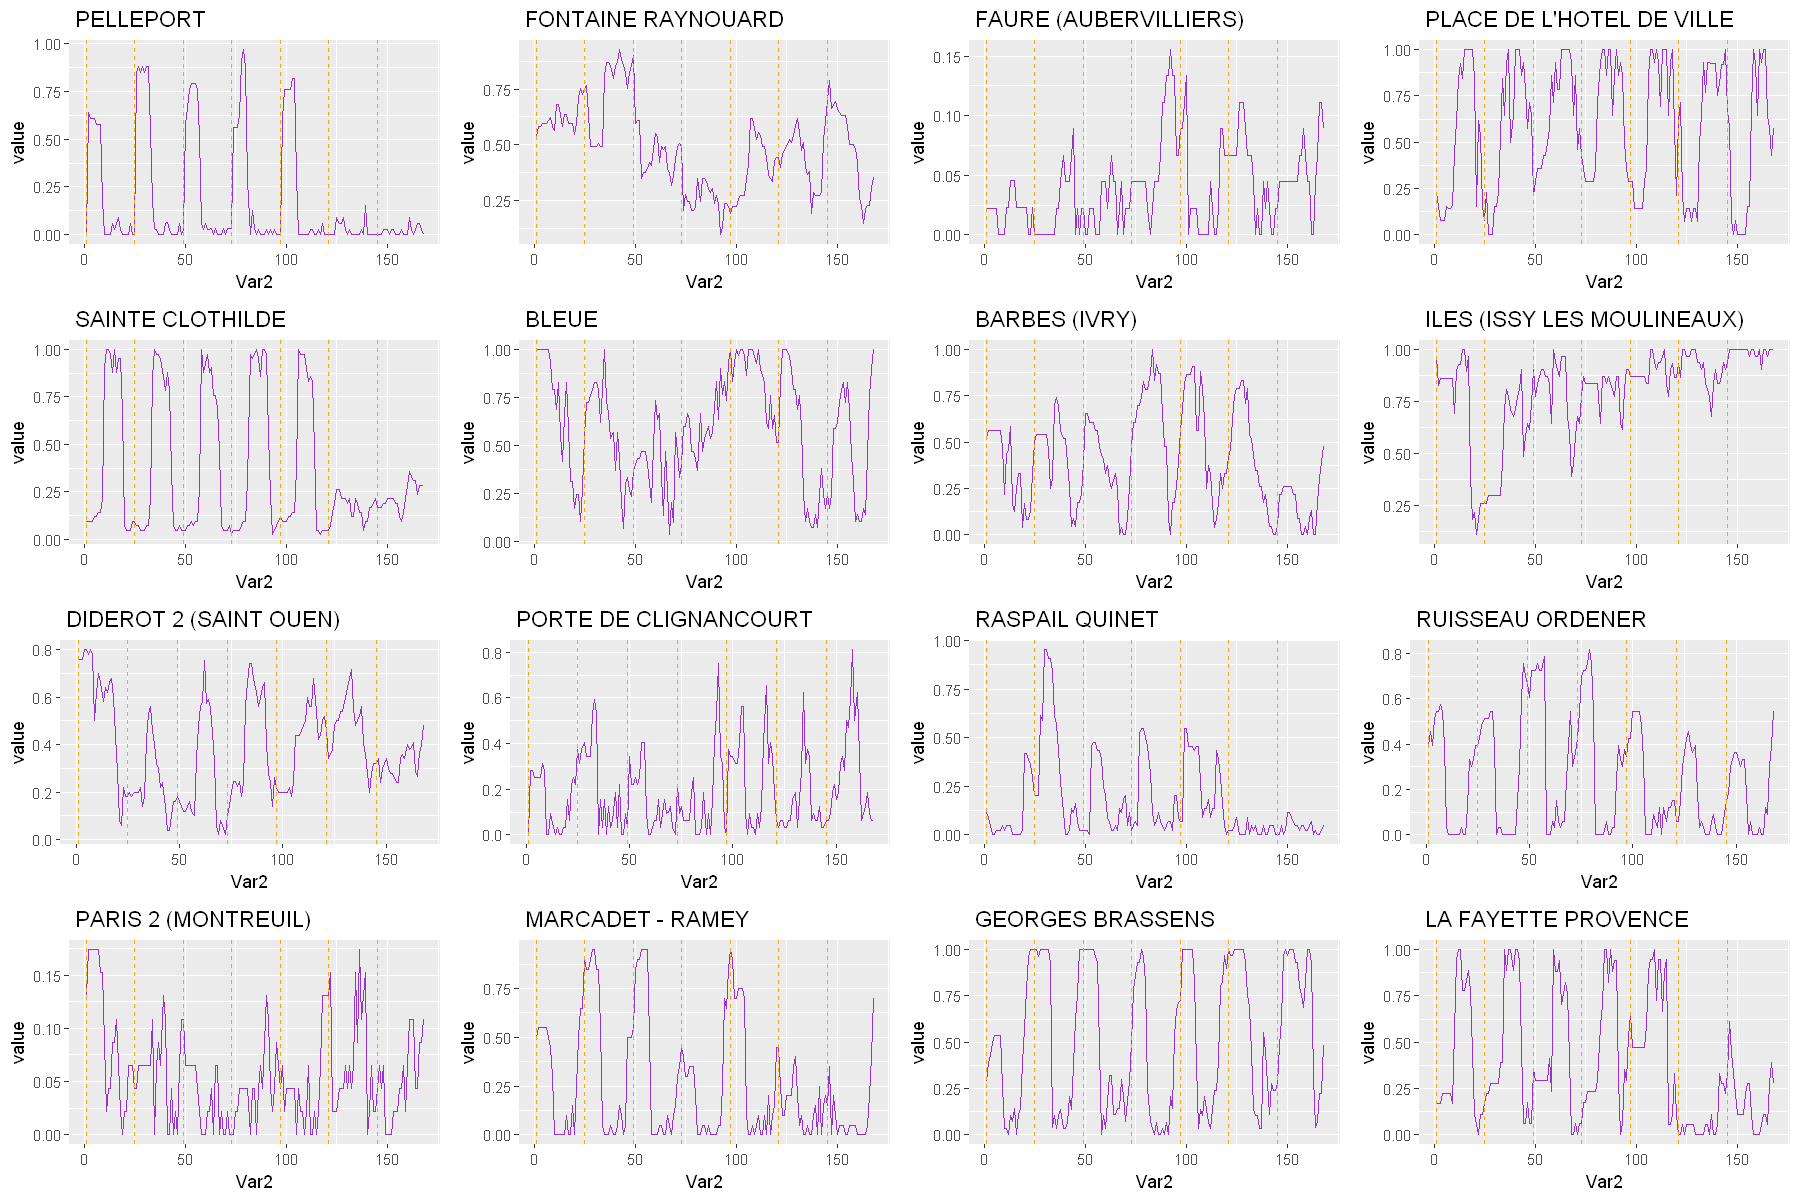

In [10]:

options(repr.plot.width = 15, repr.plot.height = 10)

timeTick = 1 + 24*(0:6)  # vector corresponding to the beginning of days

# select 16 stations
stations = sample.int(nrow(loading), 16)

df = melt(loading[stations,])  #the function melt reshapes it from wide to long

p = list()
for (i in 1:16){
    dfi = df[df$Var1 == velib$names[stations[i]],]
    p[[i]] = ggplot(dfi, aes(x=Var2, y=value)) + 
        geom_line(col="darkorchid") + 
        geom_vline(xintercept=timeTick, col="orange", linetype="dashed") +
        labs(title=velib$names[stations[i]])
}
do.call(grid.arrange,p)

Interprétation : 

On observe une série de graphiques qui représentent le niveau de chargement des stations de Vélib à Paris sur une période de temps d'une semaine, avec des intervalles de temps horaires sur l'axe des abscisses (Time) et le niveau de chargement sur l'axe des ordonnées (Loading).

* Variations temporelles : Chaque graphique montre les variations dans la semaine du nombre de vélos disponibles dans chaque station, parmis 16 prises au hasard. Les pics à 1 indiquent que tous les vélos sont disponibles à ce moment-là. On observe les périodes de la journée où les vélos sont les plus utilisés (les creux dans les graphiques), cela poueeait correspondre aux déplacements pendulaires pour se rendre sur les lieux de travail. On remarque une temporalité dans certaines stations, avec des taux de chargements similaires sur les 5 premiers jours de la semaine, et des différences au niveau des chargements les week-ends. Les pics correspondes aux périodes où les vélos sont les moins disponibles, c'est à dire les moments où les taux de chargements des stations Vélib sont les plus grands.

* Comparaison entre les stations : En comparant les graphiques entre eux, on peut identifier les stations qui ont un taux de rotation élevé des vélos (grand nombre de variations entre des valeurs élevées et basses) et celles qui sont moins utilisées (moins de variation ou des niveaux plus constants).

### Etude du chargement médian des stations

Avec les courbes précédentes, nous avons pu constater des variations importantes entre les stations. Malgré cela, on retrouve une similarité commune sur la temporalité et les similarités observées sur certains jours. Nous allons étudier le chargement médian des stations pour étudier cette temporalité. Le plus pertinent est ici d'afficher une superposition de boxplots, afin d'étudier la valeur médiane, ainsi que les valeurs des quantiles, en fonction des heures tout au long de la semaine. 

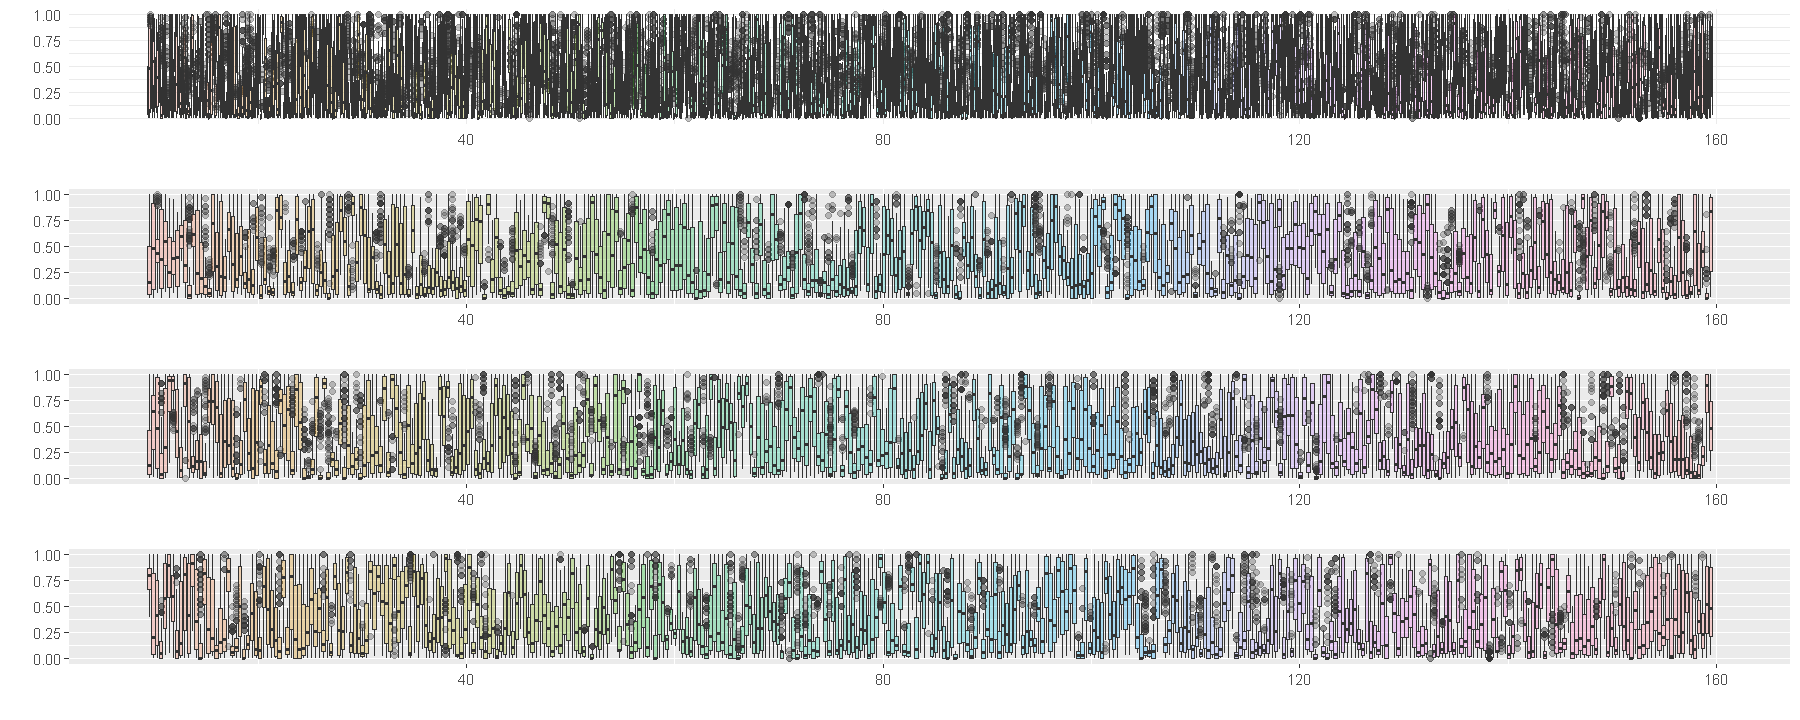

In [25]:

options(repr.plot.width = 15, repr.plot.height = 6)

df = melt(loading)
p1 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 
    geom_boxplot(alpha=.3, show.legend = FALSE) +
    xlab('') + ylab('') + theme_minimal()

# --- #

# Only a third of the data
df = melt(loading[ seq(from=1, to=+floor(nrow(loading)/3)) ,])
p2 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 
    geom_boxplot(alpha=.3, show.legend = FALSE) +
    xlab('') + ylab('')

# The next third
df = melt(loading[ seq(from=1+floor(nrow(loading)/3), to=2*floor(nrow(loading)/3)) ,])
p3 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 
    geom_boxplot(alpha=.3, show.legend = FALSE) +
    xlab('') + ylab('')

# The remaining third
df = melt(loading[ seq(from=1+2*floor(nrow(loading)/3), to=nrow(loading)) ,])
p4 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 
    geom_boxplot(alpha=.3, show.legend = FALSE) +
    xlab('') + ylab('')

# --- #

grid.arrange(p1, p2, p3, p4, nrow=4)
# changer l'affihage en utilisant éventuelelment des représentations avec des lignes, 
# ou un affichage des médianes uniuement (mais on ne voit pas l'amplitude), ou en
# changeant de librairies

Interprétation : 

Ce graphique présente une superposition de boxplots montrant l'évolution du chargement des stations vélib au cours du temps horaire sur une semaine. 

* Série temporelle : La ligne rouge représente la médiane du chargement des stations au fil du temps. Elle montre comment le niveau de chargement change. Ainsi, on peut identifier un modèle cyclique sur les 5 premiers jours de la semaine, qui pourrait correspondre aux déplacements pendulaires pour se rendre sur les lieux de travail. Ainsi, on voit une forte diminution du taux de chargement tous les matins du lundi au vendredi à la même heure et de la même amplitude sur le boxplot. Puis, le taux de chargement remonte progressivement dans la journée, de manière similaire sur les jours ouvrés. Pour le week-end, on remarque une différence avec une forte atténuation de cet effet pendulaire. Le taux de chargement est plus constant au cours de la journée, avec une forte diminution correspondant à une plus forte utilisation des vélos en fin de journée sur le samedi et dimanche. 

* Amplitude des valeurs : On observe un écart très important entre le premier et le troisième quartile, ce qui traduit une grande variation du taux de chargement entre les stations. De plus, la valeur du premier quartile augmente fortement au cours de la matinée. Cela traduit le fait que beaucoup de stations se déchargent sur cette période. Cela se remarque aussi avec les pics bi-pendulaires observés sur le troisème quartile. En effet, on remarque deux pics bien plus bas que sur les box-plots des autres horaires. Ces pics correspondents aux moments de la journée où les vélos sont les plus utilisés : la valeur du troisième quartile diminue nettement. 

### Etude de la temporalité du chargement moyen au cours de la semaine

Nous avons émis des conjectures sur la similarité de l'évolution des taux de chargement sur less jours de travail, ainsi qu'une différence observée au niveau des week-ends. Nous souhaitons vérifier cette hypothèse. Pour ce faire, nous allons calculer le chargement moyen des sttions sur chaque heure d'une journée, puis comparer l'évolution de cette moyenne en fonction des jours de la semaine. Il est pertinent d'afficher l'évolution de la moyenne sur l'ensemble des jours de la semaine pour étudier la tendance suivie.

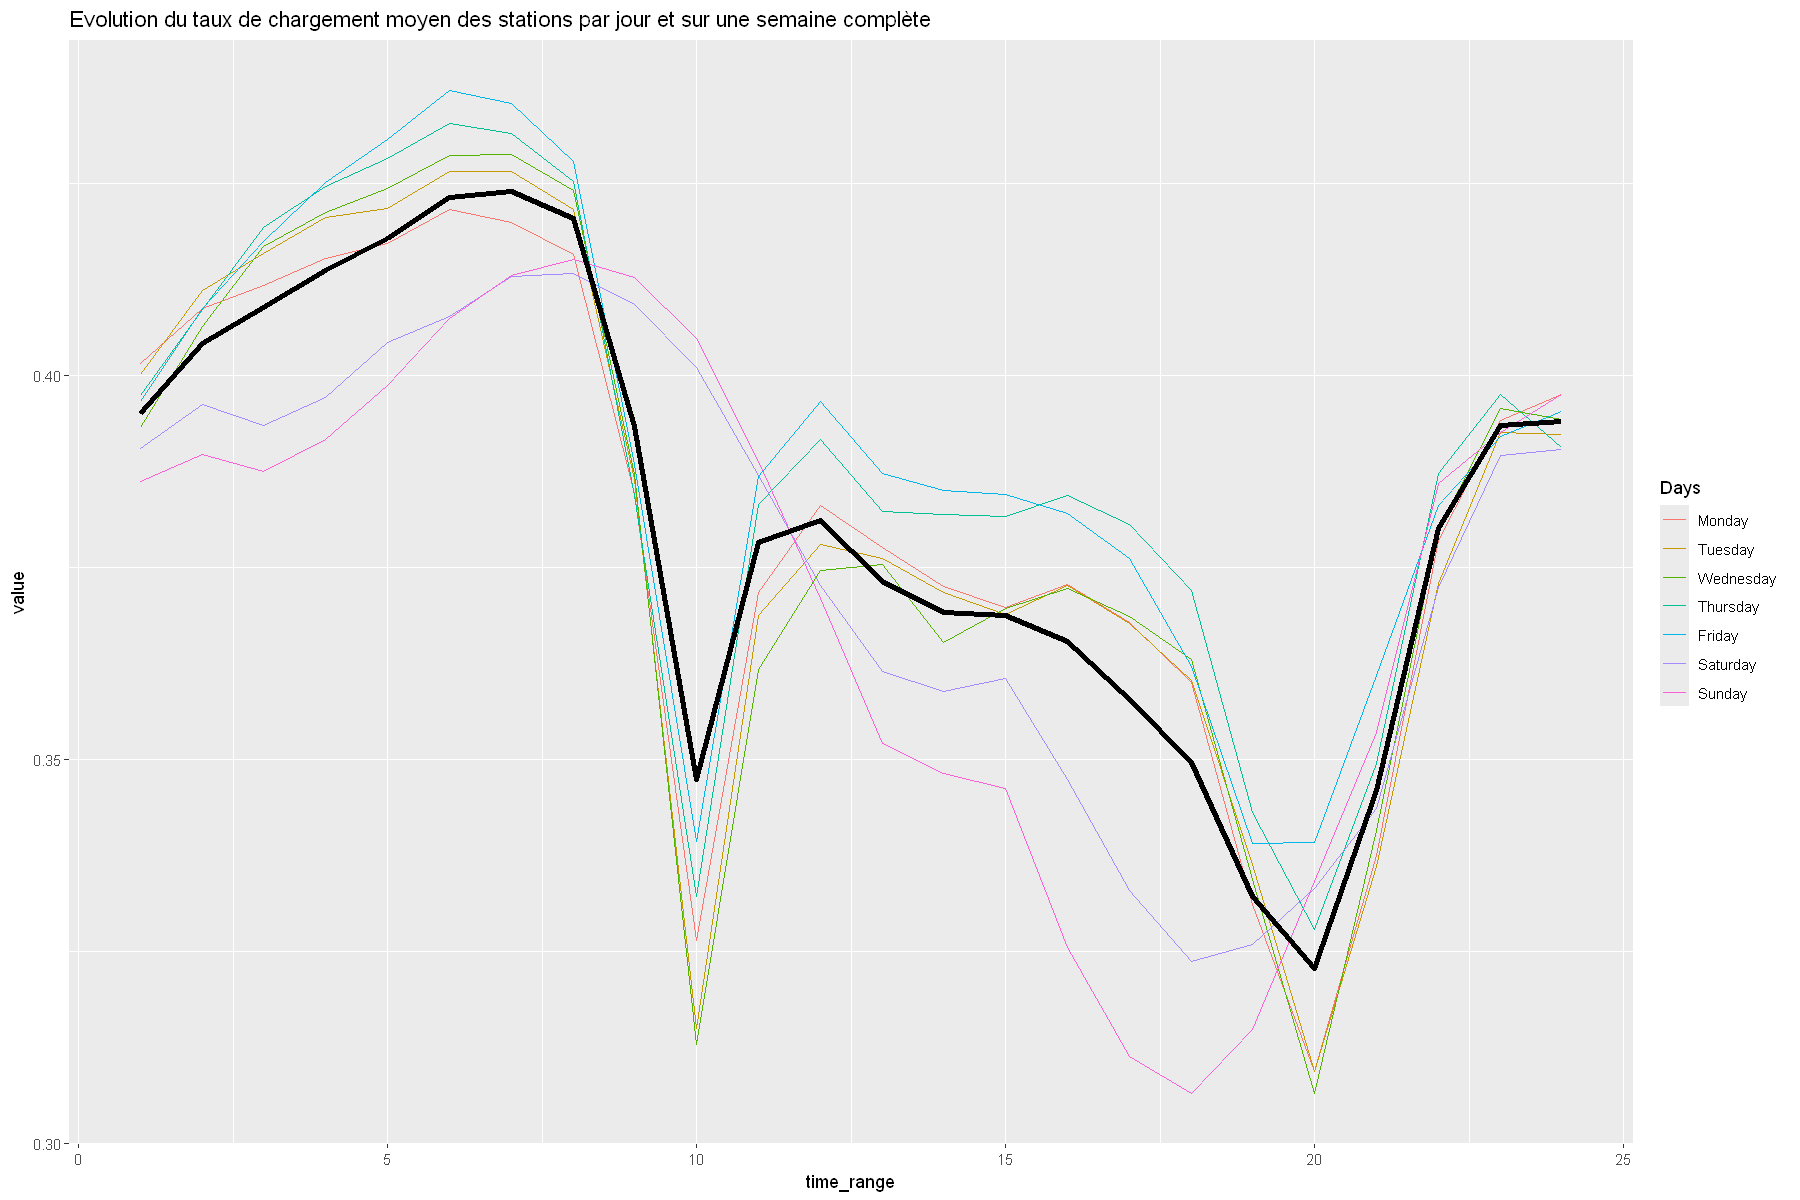

In [26]:
mean_per_hour_per_day = colMeans(loading)
mean_per_hour_per_day = matrix(mean_per_hour_per_day, nrow = 24)
mean_per_hour         = rowMeans(mean_per_hour_per_day)



mean_per_hour_per_day            = as.data.frame(mean_per_hour_per_day)
colnames(mean_per_hour_per_day)  = list("Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday")
mean_per_hour_per_day$time_range = c(1:24)
mean_per_hour_per_day            = melt(mean_per_hour_per_day, id='time_range', variable.name='Days')

mean_per_hour            = as.data.frame(mean_per_hour)
colnames(mean_per_hour)  = list("Weekly")
mean_per_hour$time_range = c(1:24)



options(repr.plot.width = 15, repr.plot.height = 10)

ggplot() + 
    ggtitle("Evolution du taux de chargement moyen des stations par jour et sur une semaine complète")+
    geom_line(data=mean_per_hour_per_day, aes(x=time_range, y=value, color=Days)) + 
    geom_line(data=mean_per_hour, aes(x=time_range, y=Weekly), linewidth = 1.5)

#rajouter un titre 

Interprétation : 

Tout d'abord, on peut visualiser des variations quotidiennes. Chaque ligne colorée représente un jour différent de la semaine, et la ligne noire représente la moyenne sur toute la semaine. On peut observer les tendances de chargement des stations pour chaque jour travaillé. On confirme également que le taux de chargement est différent pendant les week-ends, avec néanmoins une similarité observée entre le samedi et le dimanche. De plus, la moyenne hebdomadaire suit la tendance des jours travaillés. 

On remarque aussi des pics et des creux. Les pics représentent les heures où les stations sont les plus chargées en moyenne, ce qui pourrait correspondre aux heures avant que les gens ne se rendent au travail ou à l'école. Les creux représentent les heures où les stations sont les moins chargées, ce qui pourrait correspondre aux heures de pointe où les vélos sont utilisés pour les trajets. Cela va dans le même sens que nos hypothèses sur les boxplots superposés.

On peut en déduire des habitudes dans les comportements des utilisateurs. Par exemple, si les stations sont moins chargées vers 8h et 18h, cela pourrait indiquer les heures de début et de fin de journée de travail typiques.

En examinant les différences entre les jours de la semaine, on peut identifier des tendances spécifiques, comme des jours avec une plus grande utilisation des vélos. Par exemple, si les lignes pour le samedi et le dimanche montrent un chargement plus élevé pendant la journée, cela pourrait indiquer une utilisation récréative plus importante pendant les week-ends.


### Etude des stations vélib sur une carte 

Nous avons constaté des fortes disparités du taux de chargement en fonction des stations en affichant le pannel aléatoir de 16 sations de notre jeu de données. Nous nous demandons si cette disparité est due à l'emplacement géographique des stations. Par exemple, nous pouvons nous demander si le fait que certaines stations commencent la journée avec un taux de chargement faible pourraient être des stations se situant dans des quartiers de bureaux (généralement au centre, vers La Défense...), et se remplissent fortement dans la matinée. A contrario, certaines stations situées en périphérie pourraient commencer la journée avec un taux de remplissage élevé, puis se vider sur la période de départ au travail/école, et se remplir à nouveau en fin de journée. 

Pour étudier cela, nous allons étudier le taux de remplissage des staions sur une carte sur une même journée, à différents moments.

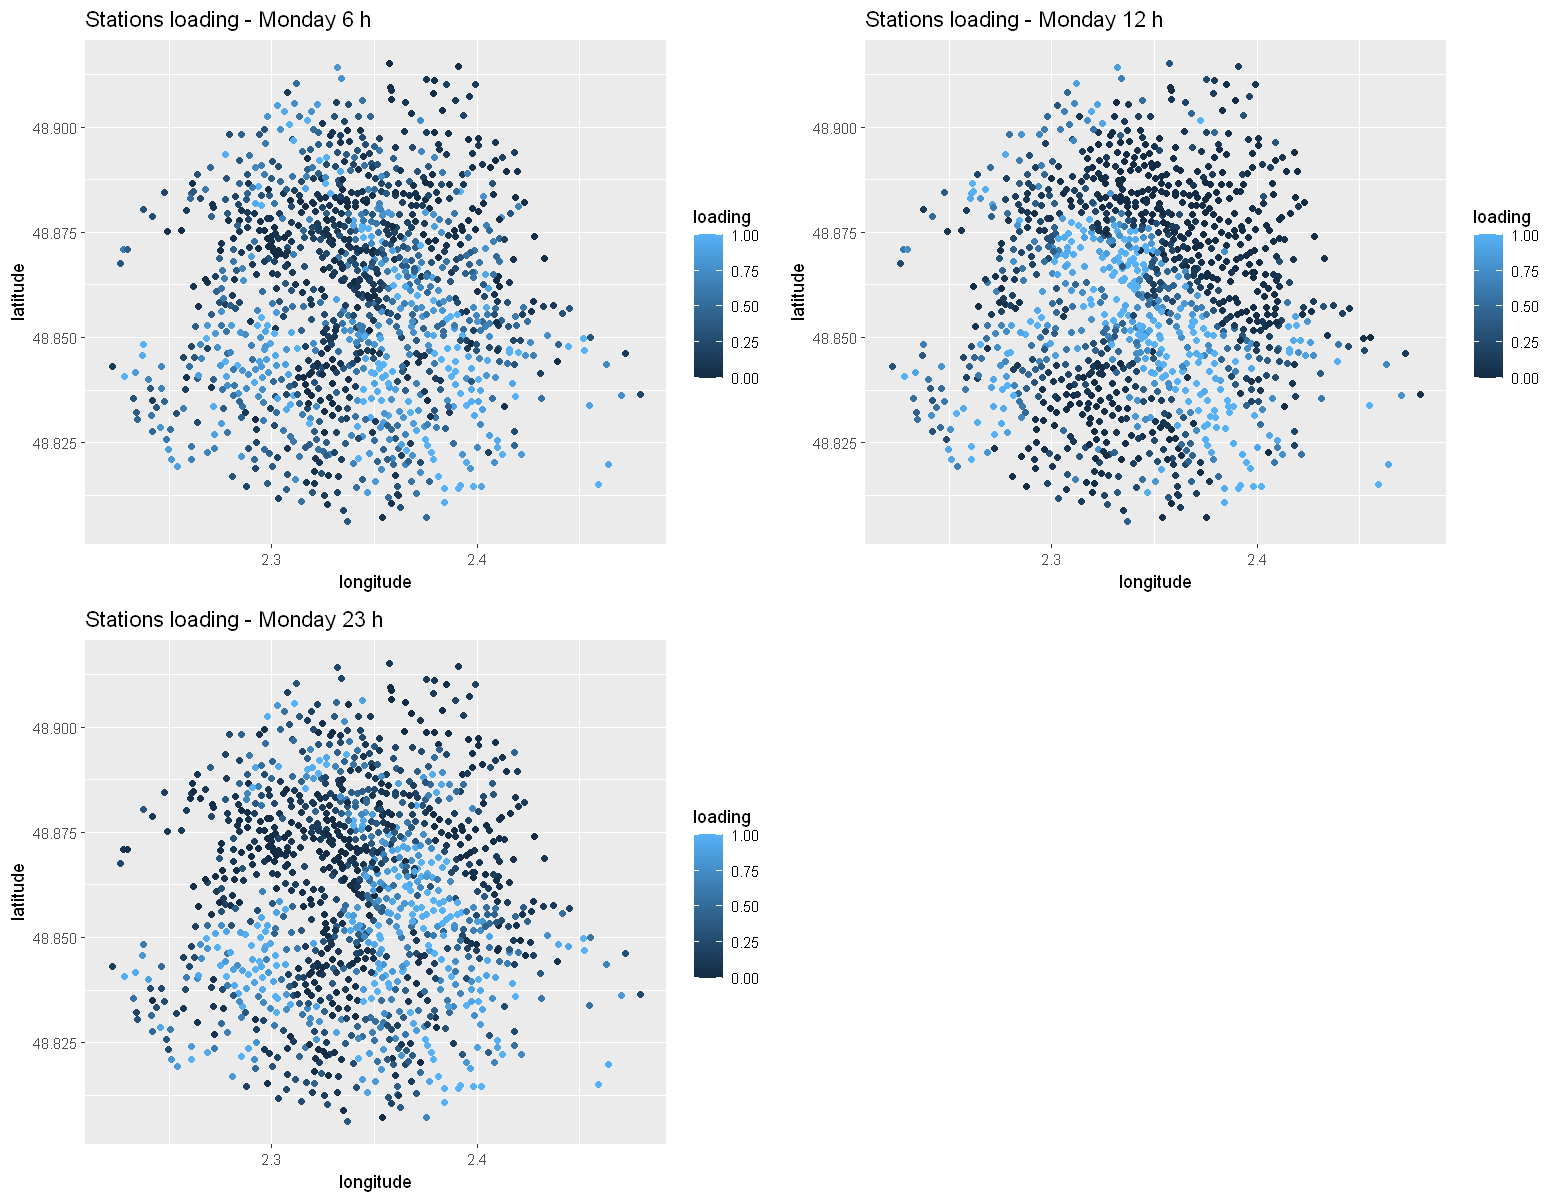

In [13]:
# Hours to be displayed
options(repr.plot.width = 13, repr.plot.height = 10)
hours = c(6, 12, 23) # Monday at hour 6h, 12h, 23h

dfi = coord
p = list()
for (i in 1:length(hours)){
    dfi$loading = loading[,hours[i]]
    p[[i]] = ggplot(dfi, aes(x=longitude, y=latitude, color=loading)) + 
        geom_point() +
        labs(title = paste("Stations loading - Monday",hours[i],"h"))
}

do.call(grid.arrange,c(p, ncol=2))

Les axes représentent la latitude et la longitude, positionnant ainsi les stations de Vélib sur une carte de Paris.
La couleur de chaque point représente le niveau de chargement de la station à l'heure indiquée, avec un code couleur allant du violet (peu ou pas de vélos disponibles) au jaune (station complètement chargée).

* Analyse à 6 heures (premier graphique à gauche) :

À 6 heures du matin, on observe une majorité de stations avec un chargement moyen à élevé (beaucoup de points jaunes et oranges). Cela suggère que les vélos ne sont pas encore largement utilisés à cette heure, ce qui est attendu tôt le matin. Et confirme l'hypothèse sur les stations en banlieu ou périphérie.

* Analyse à 12 heures (graphique du milieu) :

À midi, les couleurs sont peu variées. En effet, les stations sont soit assez pleines, soit assez vides. Il n'y a pas vraiment de station avec un taux de chargement moyen. De plus, on observe un regroupement central des stations présentant de la disponibilité. Ce regroupement peut correspondre aux quartiers de bureaux. 

* Analyse à 23 heures (dernier graphique à droite) :

À 23 heures, on observe une situation qui se rapproche de celle du même jour à 6h du matin. La répartition est plus homogène et les stations sont globalement chargées, les vélos sont disponibles, il y compris en périphérie.Cela pourrait indiquer que les gens ont tendance à moins utiliser les vélos en fin de soirée, qu'ils sont rentrés dans des quartiers résidentiels, ou que les vélos ont été retournés aux stations après les déplacements de la journée.


Ces cartes de chaleur peuvent également aider les gestionnaires de Vélib à identifier les zones où il y a une demande élevée de vélos à certaines heures, et où un rééquilibrage pourrait être nécessaire pour s'assurer que les utilisateurs trouvent des vélos disponibles en fonction de l'heure.

Finalement, cette analyse concorde avec nos hypothèses sur les taux de remplissages en fonction des types de quartiers (résidentiels ou de bureaux). ).

### Etude des déplacements pendulaires sur une carte

Pour mettre en lumière les déplacements pendulaires, et ainsi confirmer ou invalider nos hypothèses, nous allons représenter ce même style de graphique avant les déplacements pendulaires (par exmple le matin assez tôt), et après (par exemple en milieu de matinée).

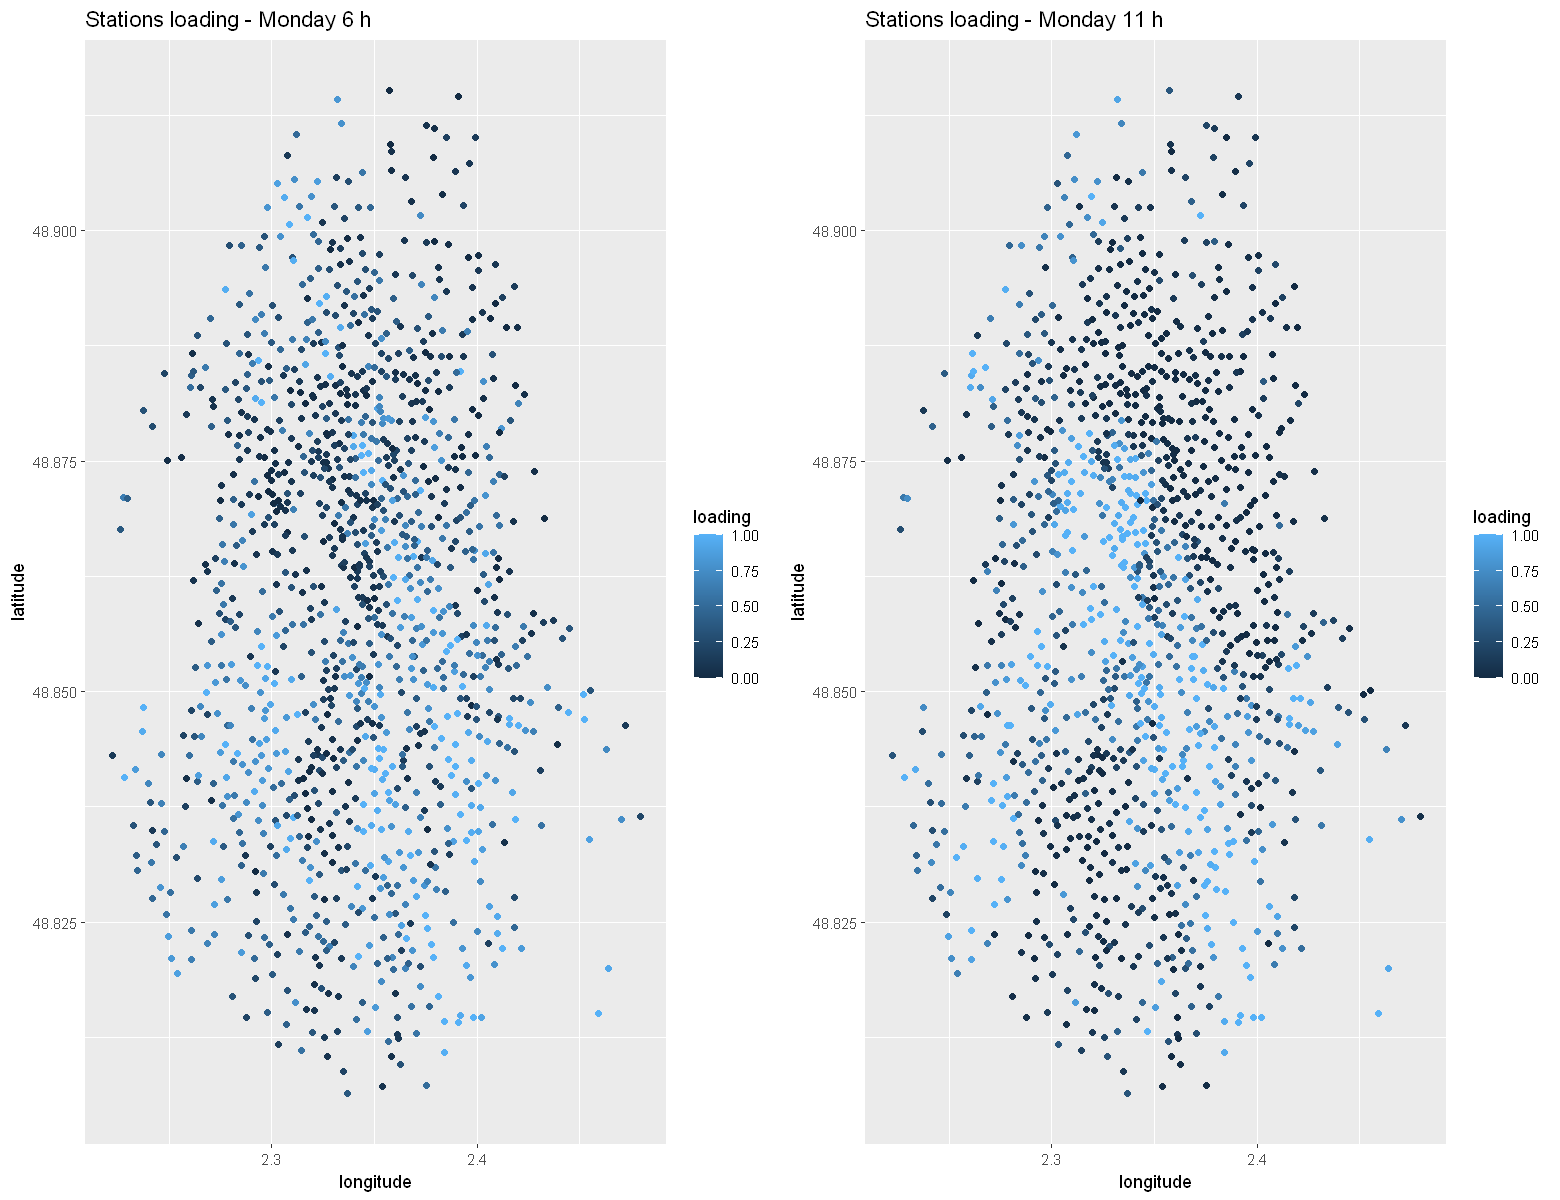

In [14]:
# Hours to be displayed
options(repr.plot.width = 13, repr.plot.height = 10)
hours = c(6, 11) # Monday at hour 6h, 11h

dfi = coord
p = list()
for (i in 1:length(hours)){
    dfi$loading = loading[,hours[i]]
    p[[i]] = ggplot(dfi, aes(x=longitude, y=latitude, color=loading)) + 
        geom_point() +
        labs(title = paste("Stations loading - Monday",hours[i],"h"))
}

do.call(grid.arrange,c(p, ncol=2))

Interprétation : 

Sur cette carte, nous observons clairement que les stations en périphérie se vident au profit des stations au centre. De plus, puisque les tendances observées sur tous les jours travaillés sont les mêmes (cf : Etude de la temporalité du chargement moyen au cours de la semaine), on peut alors valider notre hypothèse selon laquelle les déplacements pendulaires font que les vélos sont utilisés de l'extérieur de la ville vers le centre, où sont regroupés les quartiers de bureaux. 

### Influence de l'altitude des stations sur les taux de chargement

Nous avons présenté la colonne bonus dans l'introduction de ce projet. Nous allons regarder si cet élément à une influence sur le taux de chargement des stations. Pour ce faire, nous allons commencer par étudier la répartition des stations en altitude.

$title
[1] "Titre du graphique"

attr(,"class")
[1] "labels"

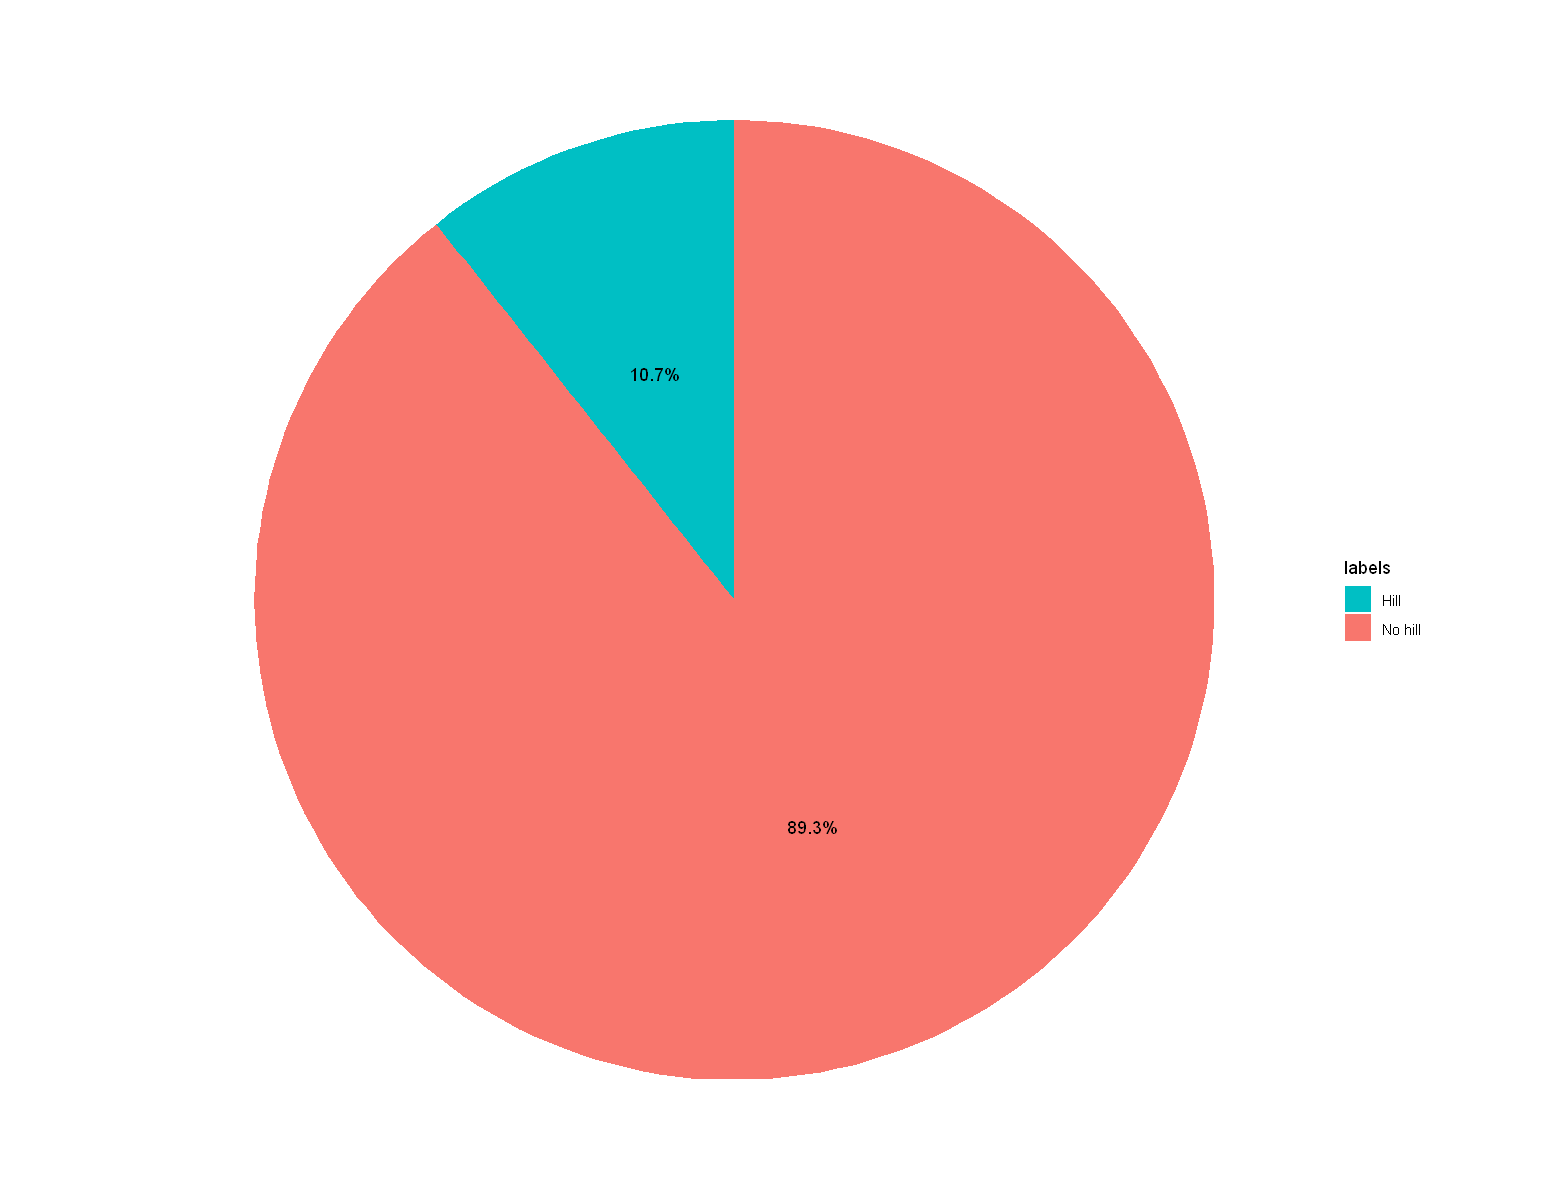

In [15]:
ggtitle("Titre du graphique")
df <- data.frame(size = c(sum(coord$bonus == 0), sum(coord$bonus == 1)),
                 labels = c('No hill', 'Hill'))

# Calculer les pourcentages
df$percentage <- df$size / sum(df$size) * 100

# Créer le graphique en coordonnées polaires avec ggplot2
ggplot(df, aes(x = "", y = percentage, fill = labels)) +
  geom_bar(stat = "identity", width = 1, position = "fill") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), position = position_fill(vjust = 0.5)) +
  coord_polar(theta = "y") +
  scale_fill_hue(direction = -1) +  # pour inverser l'ordre du colormap par défaut
  theme_void()


Interprétation : 

La grande majorité des stations Vélib, soit 89.3%, sont situées en plaine. Cela suggère que la plupart des stations sont dans des zones relativement plates de la ville. Seulement 10.7% des stations sont situées en altitude. Ces stations peuvent se trouver sur des collines ou dans des zones élevées de la ville.

Cette répartition peut avoir des implications sur l'usage des vélos. Les stations en plaine sont probablement plus fréquentées en raison de la facilité de pédalage sur terrain plat. Les stations en altitude pourraient avoir moins de fréquentation en raison de l'effort supplémentaire requis pour y accéder ou en partir, bien qu'elles puissent servir des zones résidentielles situées en hauteur.

Cela peut avoir un impact sur des opérations logistiques. Il peut y avoir des opérations de rééquilibrage des vélos (s'assurer que les stations ne soient ni vides ni pleines). Il peut être plus difficile de maintenir un bon équilibre pour les stations en altitude, en particulier si les utilisateurs ont tendance à prendre les vélos en descente et non en montée.

### Représentation des stations en altitude sur une carte

Nous allons étudier la répartition géographique des stations en altitude. De manière analogue aux première visualisations sur cartes, nous allons représenter la répartition des stations en altitude sous forme de nuage de points. En s'appuyant sur nos observations précédentes, nous allons voir si cet élément peut avoir une influence sur les chargements des stations.

Nous allons également juxtaposer la carte montrant le taux de chargement à 6h du matin pour comparer avec le taux de chargement des stations.

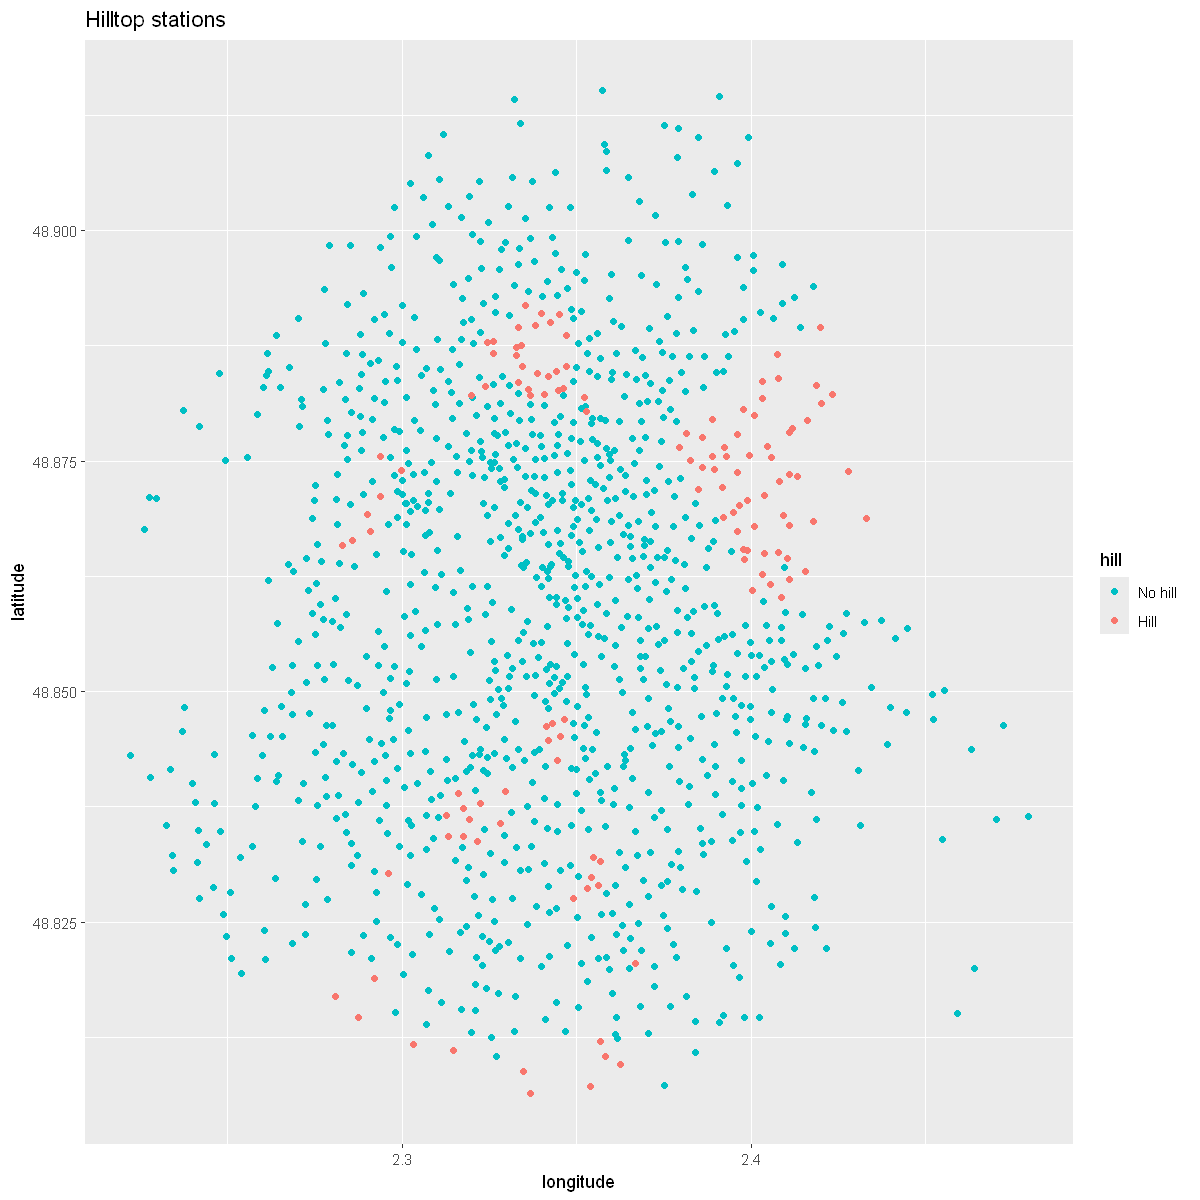

In [16]:
coord$hill = as.factor(coord$bonus)
levels(coord$hill) = c('No hill','Hill')

# --- #

options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(coord, aes(x=longitude, y=latitude, color=hill)) + 
    geom_point() +
    scale_color_hue(direction = -1) +
    labs(title = 'Hilltop stations')


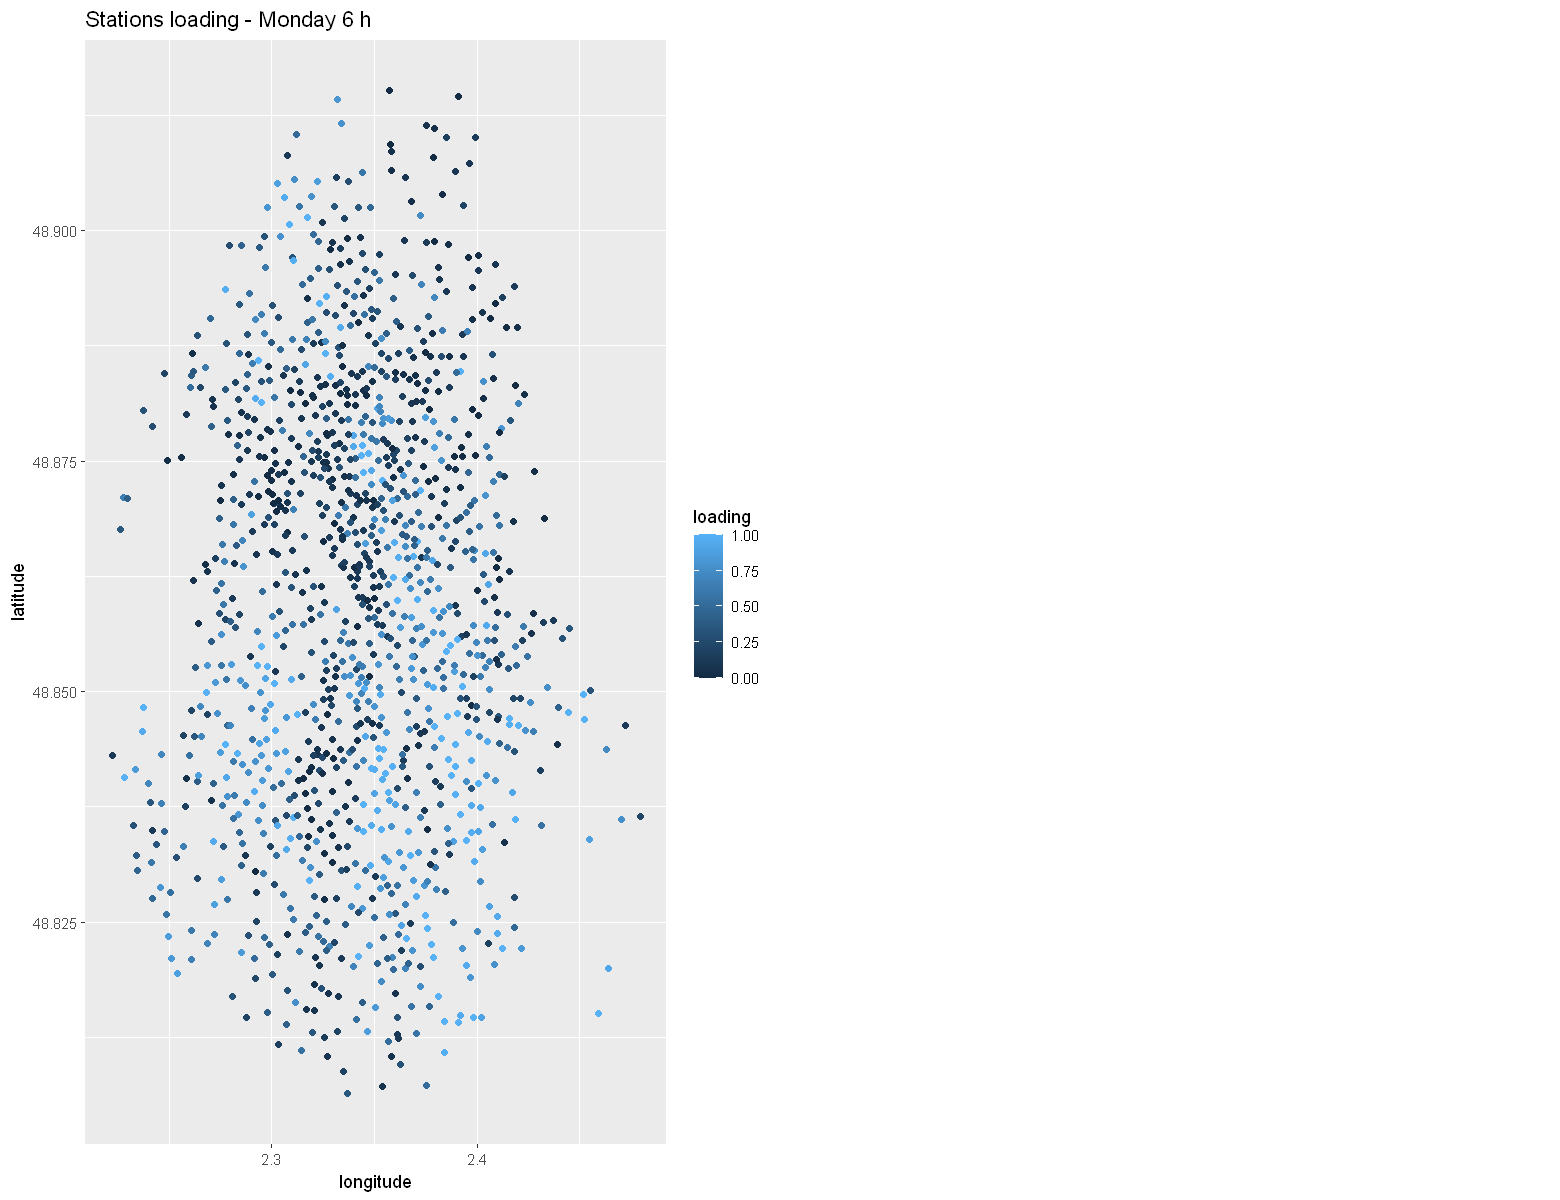

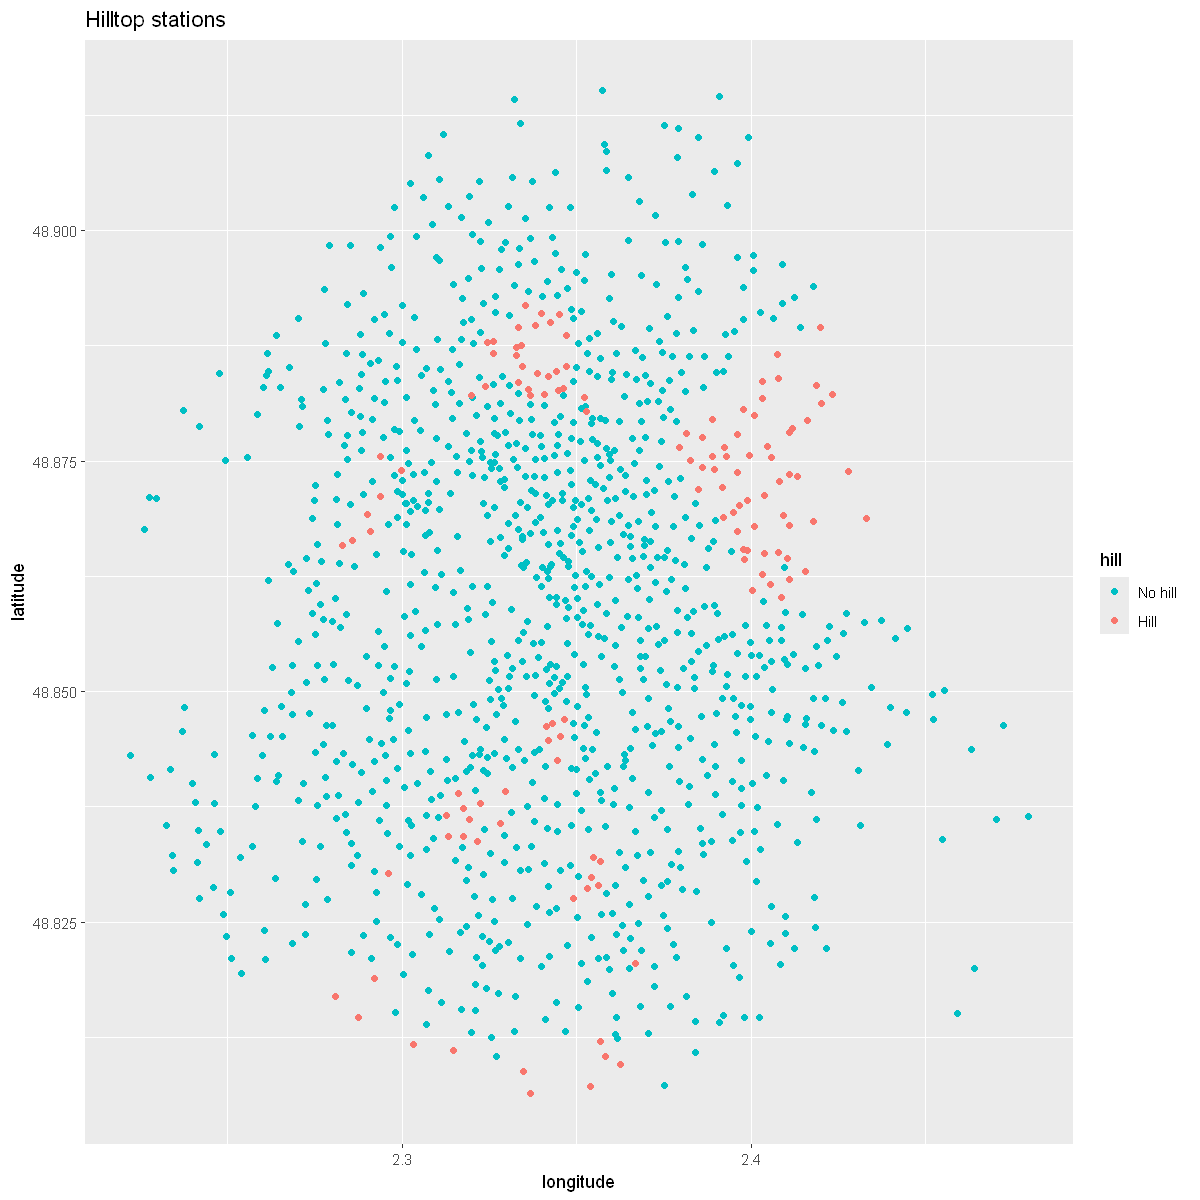

In [17]:
# Hours to be displayed
options(repr.plot.width = 13, repr.plot.height = 10)
hours = c(6) # Monday at hour 6h

dfi = coord
p = list()
for (i in 1:length(hours)){
    dfi$loading = loading[,hours[i]]
    p[[i]] = ggplot(dfi, aes(x=longitude, y=latitude, color=loading)) + 
        geom_point() +
        labs(title = paste("Stations loading - Monday",hours[i],"h"))
}

do.call(grid.arrange,c(p, ncol=2))
coord$hill = as.factor(coord$bonus)
levels(coord$hill) = c('No hill','Hill')

# --- #

options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(coord, aes(x=longitude, y=latitude, color=hill)) + 
    geom_point() +
    scale_color_hue(direction = -1) +
    labs(title = 'Hilltop stations')


Interprétation :

    Distribution géographique :

Les stations situées en plaine sont largement réparties sur toute la carte, indiquant une bonne couverture de ces zones par le réseau Vélib. Les stations en altitude sont moins nombreuses et semblent être groupées dans certaines zones, ce qui est cohérent avec le diagramme en camembert précédent indiquant que seulement 10,7 % des stations sont en altitude.

    Accessibilité et préférences d'utilisation :

Comme les stations en plaine sont plus nombreuses et probablement plus accessibles, elles sont susceptibles d'être plus utilisées, comme nous l'avons discuté précédemment. Cela pourrait être dû à la facilité de pédaler sur un terrain plat. Les stations en altitude peuvent avoir des taux d'utilisation plus faibles, notamment parce que les efforts nécessaires pour atteindre ces stations sont plus importants, ce qui peut dissuader leur utilisation, surtout lorsqu'il s'agit de remonter.

    Implications pour la planification urbaine :

L'emplacement des stations en altitude peut nécessiter une attention particulière de la part des planificateurs urbains et des gestionnaires de Vélib pour garantir une distribution équilibrée des vélos et pour encourager leur utilisation, peut-être en offrant des incitations. Cependant, en juxtaposnt les deux cartes comme dans la deuxième partie du graphique, on remarque que les stations en altitudes ont un faible taux de remplissage le matin à 6h. On en déduit que les vélos ne sont pas nécéssairement remontés dans ces stations, peut être parce qu'ils ne sont pas beaucoup demandé. Cela va dans le sens du caractère plus sportif de leur accessibilité.

    Corrélation avec la topographie :

La concentration des stations en altitude dans des zones spécifiques peut correspondre à la topographie de Paris, avec des collines comme Montmartre ou Belleville. Cela montre que le réseau Vélib tient compte du relief de la ville dans la planification de l'emplacement des stations.


## Conclusion sur l'étude descriptive

L'étude statistique a fourni des perspectives significatives sur la dynamique d'utilisation des stations Vélib à Paris. Nous avons examiné plusieurs aspects, notamment la disponibilité des vélos à différentes heures de la journée et des jours de la semaine, la distribution géographique des stations par rapport à la topographie de la ville et la répartition des stations entre les zones de plaine et les zones en altitude.

Les graphiques temporels ont montré des modèles d'utilisation distincts au cours de la journée, avec des pics de disponibilité des vélos tôt le matin et tard le soir, et une diminution pendant les heures de pointe. Ces tendances sont probablement liées aux habitudes de déplacement des parisiens, avec un usage plus intense lors des trajets pendulaires et une utilisation moindre durant les heures creuses.

La répartition spatiale des stations de Vélib a révélé que la majorité des stations sont situées en plaine, facilitant l'accès et l'utilisation. En revanche, une minorité de stations situées en altitude pourrait indiquer des défis spécifiques, tels que des efforts supplémentaires pour atteindre ces stations, pouvant expliquer une utilisation moins fréquente.

Nous allons maintenant étudier les possibilités de réduction de dimension de nos jeux de données.

# II - Réduction de dimension par ACP (Analyse en Composantes Principales)

Dans cette partie, nous allons procéder à une Analyse en Composantes Principales (ACP). L'objectif de cette méthode est de synthétiser les variables du jeu de donbnées initial en un nombre limité de composantes principales, tout en conservant un maximun d'informations. Initialement, nous avons 168 variables, qui correspondent aux 168 heures d'une semaine. Nous allons étudier s'il est possible de réduire cette dimension, tout en conservant un maximum d'information. 

## Vérification du format des données

In [31]:
library(FactoMineR)
library(corrplot)
library(factoextra)

In [32]:
head(loading)

,1,2,3,4,5,6,7,8,9,10,⋯,159,160,161,162,163,164,165,166,167,168
EURYALE DEHAYNIN,0.03846154,0.03846154,0.07692308,0.03846154,0.03846154,0.03846154,0.03846154,0.03846154,0.10714286,0.00000000,⋯,0.29629630,0.11111111,0.1111111,0.14814815,0.30769231,0.07692308,0.11538462,0.07692308,0.1538462,0.1538462
LEMERCIER,0.47826087,0.47826087,0.47826087,0.43478261,0.43478261,0.43478261,0.43478261,0.43478261,0.26086957,0.04347826,⋯,0.04347826,0.00000000,0.2173913,0.13043478,0.04545455,0.17391304,0.17391304,0.17391304,0.2608696,0.3913043
MEZIERES RENNES,0.21818182,0.14545455,0.12727273,0.10909091,0.10909091,0.10909091,0.09090909,0.09090909,0.05454545,0.10909091,⋯,0.25925926,0.25925926,0.2037037,0.12962963,0.14814815,0.29629630,0.31481481,0.37037037,0.3703704,0.4074074
FARMAN,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,1.00000000,1.00000000,1.00000000,⋯,1.00000000,1.00000000,0.9047619,0.85714286,0.85714286,0.85714286,0.76190476,0.76190476,0.7619048,0.7619048
QUAI DE LA RAPEE,0.92753623,0.81159420,0.73913043,0.72463768,0.72463768,0.72463768,0.72463768,0.72463768,0.75362319,0.97101449,⋯,0.22727273,0.45454545,0.5909091,0.83333333,1.00000000,0.81818182,0.63636364,0.71212121,0.6212121,0.5757576
CHOISY POINT D'IVRY,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.08333333,0.00000000,⋯,0.34782609,0.08695652,0.1153846,0.08695652,0.13043478,0.08695652,0.08695652,0.43478261,0.3913043,0.5217391


In [33]:
str(loading)

 num [1:1189, 1:168] 0.0385 0.4783 0.2182 0.9524 0.9275 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:1189] " EURYALE DEHAYNIN" " LEMERCIER" " MEZIERES RENNES" " FARMAN" ...
  ..$ : chr [1:168] "1" "2" "3" "4" ...


In [34]:
data_pca = scale(loading, center = FALSE, scale = FALSE)

Interprétation :

Notre dataframe sur le chargement contient uniquement des valeurs quantitatives (il est donc compatible pour une ACP). Ce sont seulement les colonnes et les lignes qui définissent notre tableau qui sont des variables qualitatives. 


## Mise en place de l'ACP

In [41]:
resultat_pca = PCA(data_pca)

In [42]:
# Afficher les 20 premières lignes des valeurs propres
head(resultat_pca$eig, 20)


,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,66.8889628,39.8148588,39.81486
comp 2,39.4864464,23.5038371,63.31870
comp 3,8.8676493,5.2783627,68.59706
comp 4,7.3053255,4.3484080,72.94547
comp 5,5.5031128,3.2756624,76.22113
comp 6,3.2457422,1.9319894,78.15312
comp 7,2.8290954,1.6839854,79.83710
comp 8,2.6843088,1.5978028,81.43491
comp 9,2.1574158,1.2841760,82.71908
comp 10,2.0572602,1.2245596,83.94364


In [43]:
# Extraire les valeurs propres (variance expliquée)
var_exp <- resultat_pca$sdev^2

# Calculer la variance cumulée
var_cumulative <- cumsum(var_exp)

# Créer un data frame pour stocker les résultats
tableau_acp <- data.frame(
  Dimension = 1:length(var_exp),
  Variance_Expliquee = var_exp,
  Variance_Cumulee = var_cumulative
)

# Tronquer le tableau aux 20 premières dimensions
tableau_acp <- tableau_acp[1:20, ]

# Afficher le tableau
print(tableau_acp)

ERROR: Error in data.frame(Dimension = 1:length(var_exp), Variance_Expliquee = var_exp, : les arguments impliquent des nombres de lignes différents : 2, 0


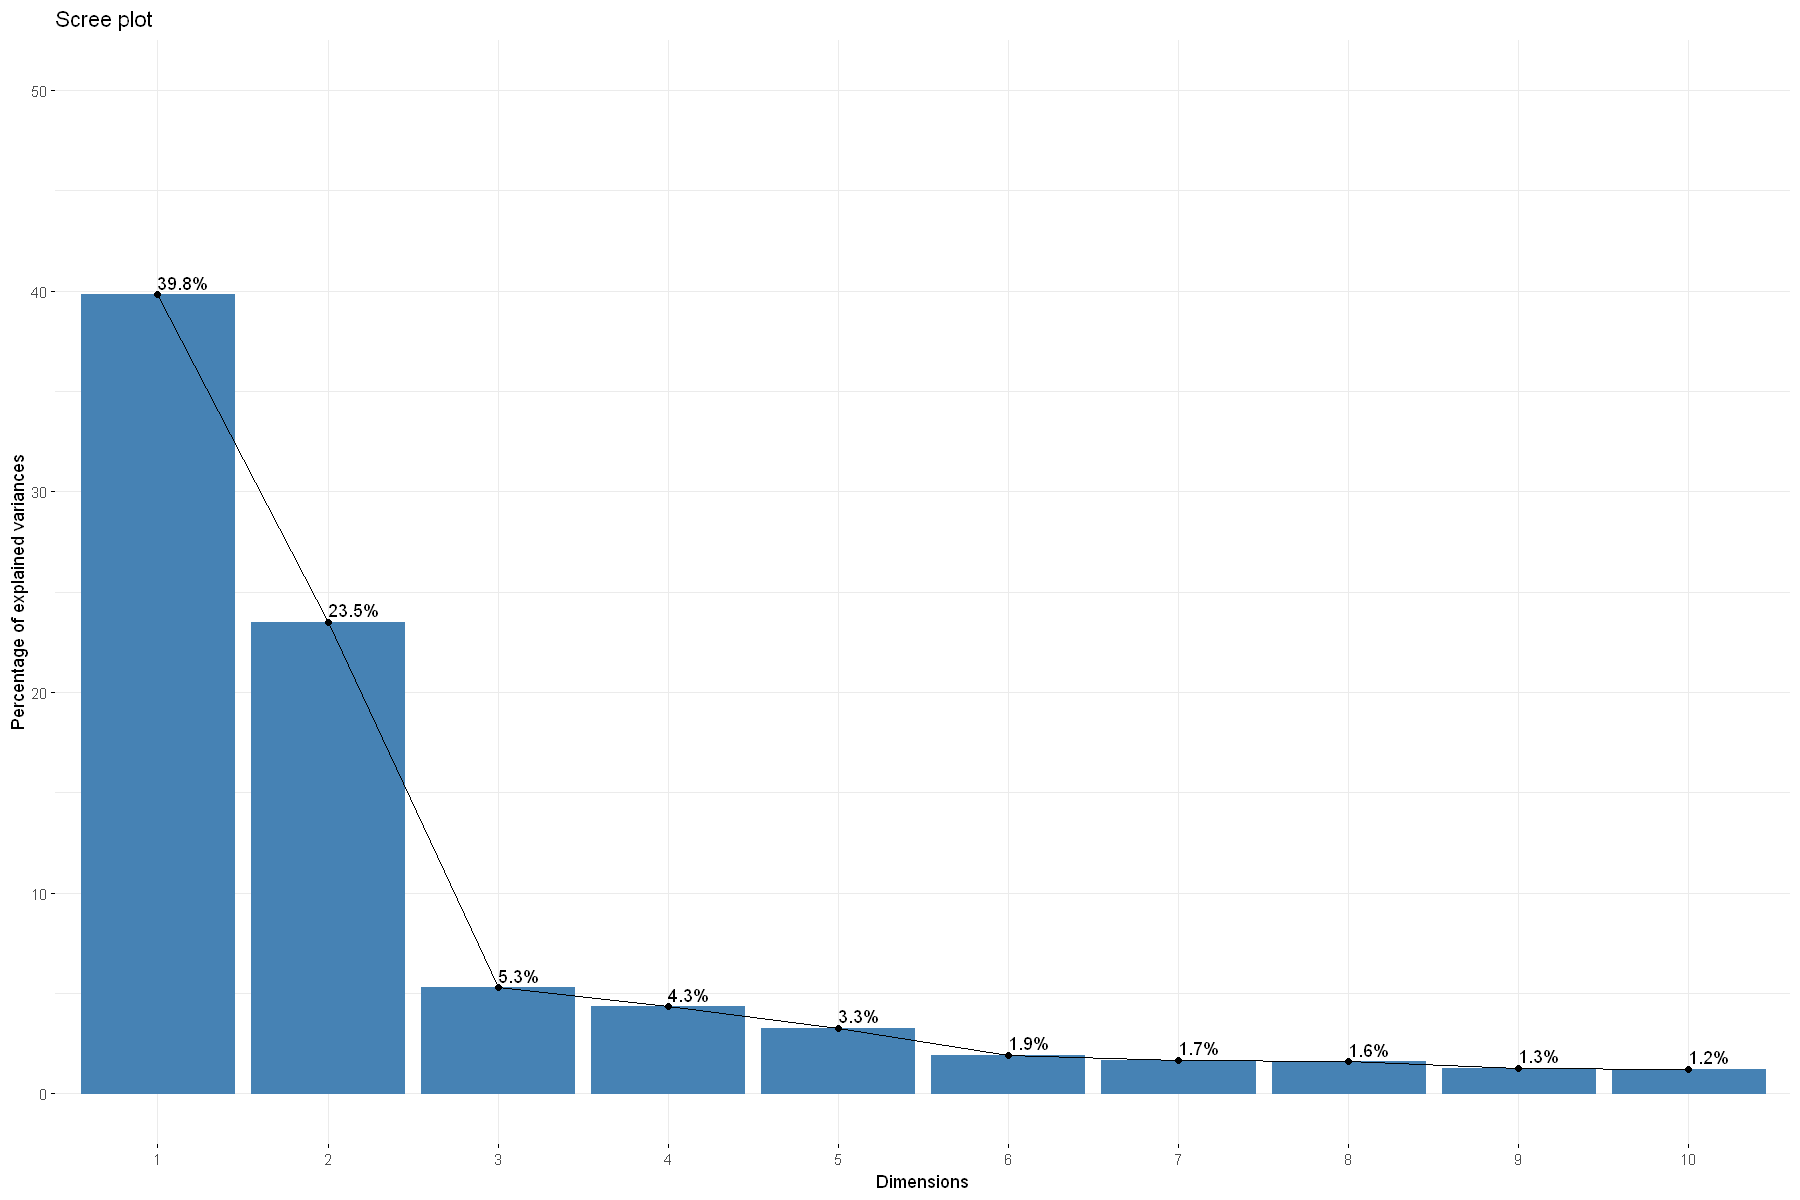

In [44]:
fviz_screeplot(resultat_pca, addlabels=TRUE, ylim=c(0,50))

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


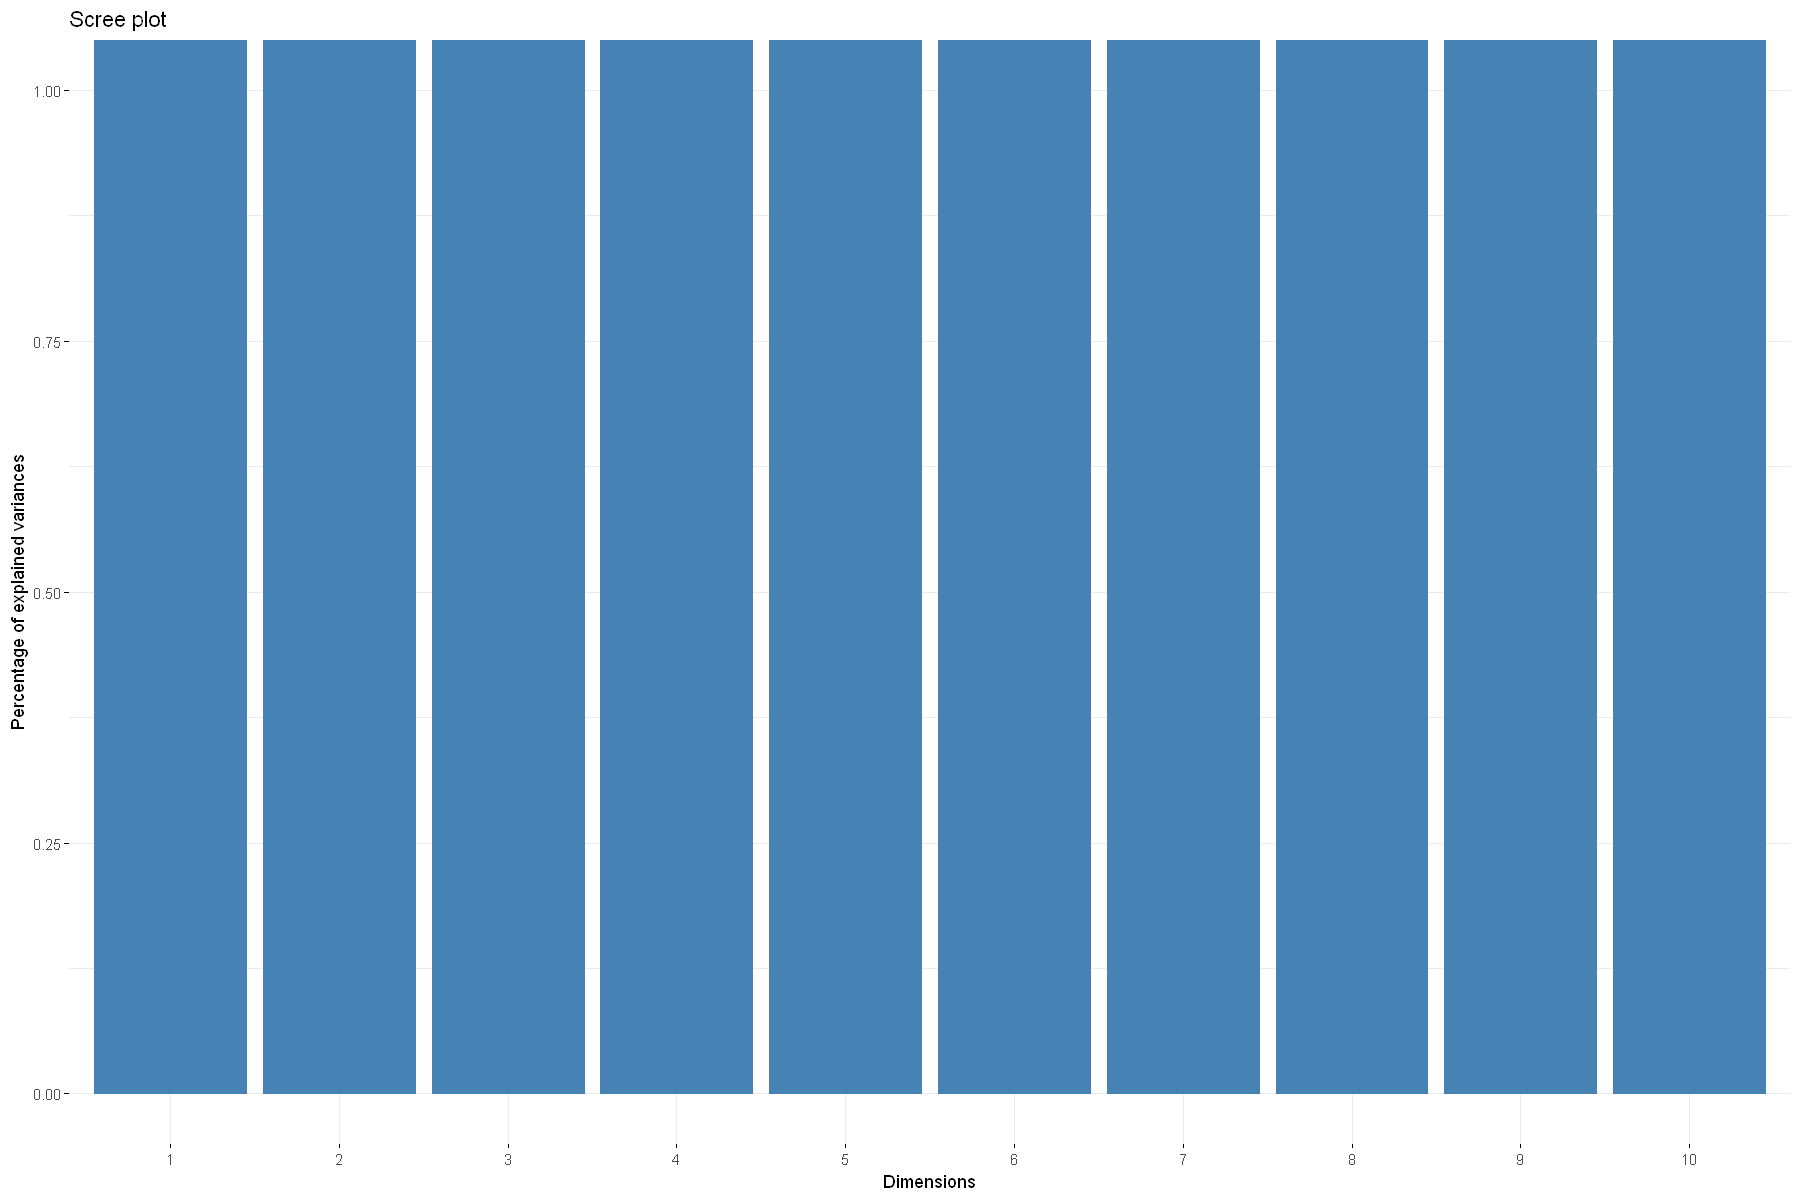

In [45]:
# Tracer le graphique des variances cumulées avec fviz_screeplot
fviz_screeplot(resultat_pca, addlines = TRUE, ylim = c(0, 1))

# Ajouter une ligne horizontale à 0.8
abline(h = 0.8, col = "red", lty = 2)

# Ajouter une ligne horizontale à 0.9
abline(h = 0.9, col = "blue", lty = 2)

Interprétation : 
* Dans un premier temps, le tableau nous présente la varianxce expliquée pour chaque dimension, ainsi que le pourcentage que cela représente. La dernière colonne nous donne les pourcentages de variances cumulées. En général, on peut se satisfaire de dimension représentant 80% de la variance cumulée. Ici, cela reviendrait à garder 7 composantes principales. Si on souhaite plus de précision, avec 90% de la variance cumulée, on peut alors garder 17 composantes principales. Cependant, on observe que les 2 premières composantes portent beaucoup d'information (65% de la variance cumulée), cela montre que ces 2 composantes portent à elles-seules beaucoup d'information. 

* Le graphique nous permet de vérifier ces observations. On remarque qu'à partir d'un certain seuil (environ 90%), il faut rajouter beaucoup de composantes dans l'ACP pour gagner de l'information sur la variance cumulée.

## Etude des composantes principales

Nous allons construire un nouveau dataframe avec les 7 premiers composantes de l'ACP. Comme présenté ci-dessus, cela nous permeter d'expliquer 80% de la variance. 

In [46]:
# Supposons que votre objet de résultat de l'ACP s'appelle resultat_pca
resultat_pca = prcomp(data_pca)

# Supposons que vous voulez créer un dataframe avec les 7 premières dimensions
loading_pca = data.frame(
  Dim1 = resultat_pca$x[, 1],
  Dim2 = resultat_pca$x[, 2],
  Dim3 = resultat_pca$x[, 3],
  Dim4 = resultat_pca$x[, 4],
  Dim5 = resultat_pca$x[, 5],
  Dim6 = resultat_pca$x[, 6],
  Dim7 = resultat_pca$x[, 7]
)

# Afficher les premières lignes du résultat
head(loading_pca)



,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.898351093,-2.323003,-0.4586635,-1.4785445,0.8986745,0.0643830,-0.1960324
2,2.549737302,-3.931784,-0.2423450,-1.0733374,0.4617664,0.4575796,0.7773415
3,1.051733801,1.056763,-0.8571908,-0.9392326,0.9818443,-0.1434297,0.6107157
4,-0.083202891,3.523981,0.5852023,2.0534663,-1.5829101,-0.2481645,-0.9804303
5,1.381803464,2.717041,0.6396883,-0.9403843,-0.5997428,1.0770013,0.1948156
6,-0.005452857,-1.795863,-0.7691141,-0.8822126,0.8534171,-0.2516383,0.4586171


Remarque: on peut noter que les valeurs de notre dataframe ne sont pas exactement les mêmes que sur le notebook Python. L'ACP sous R ne prend pas forcément la même base que sur Python, ce qui explique les valeurs parfois négatives ou positives. 

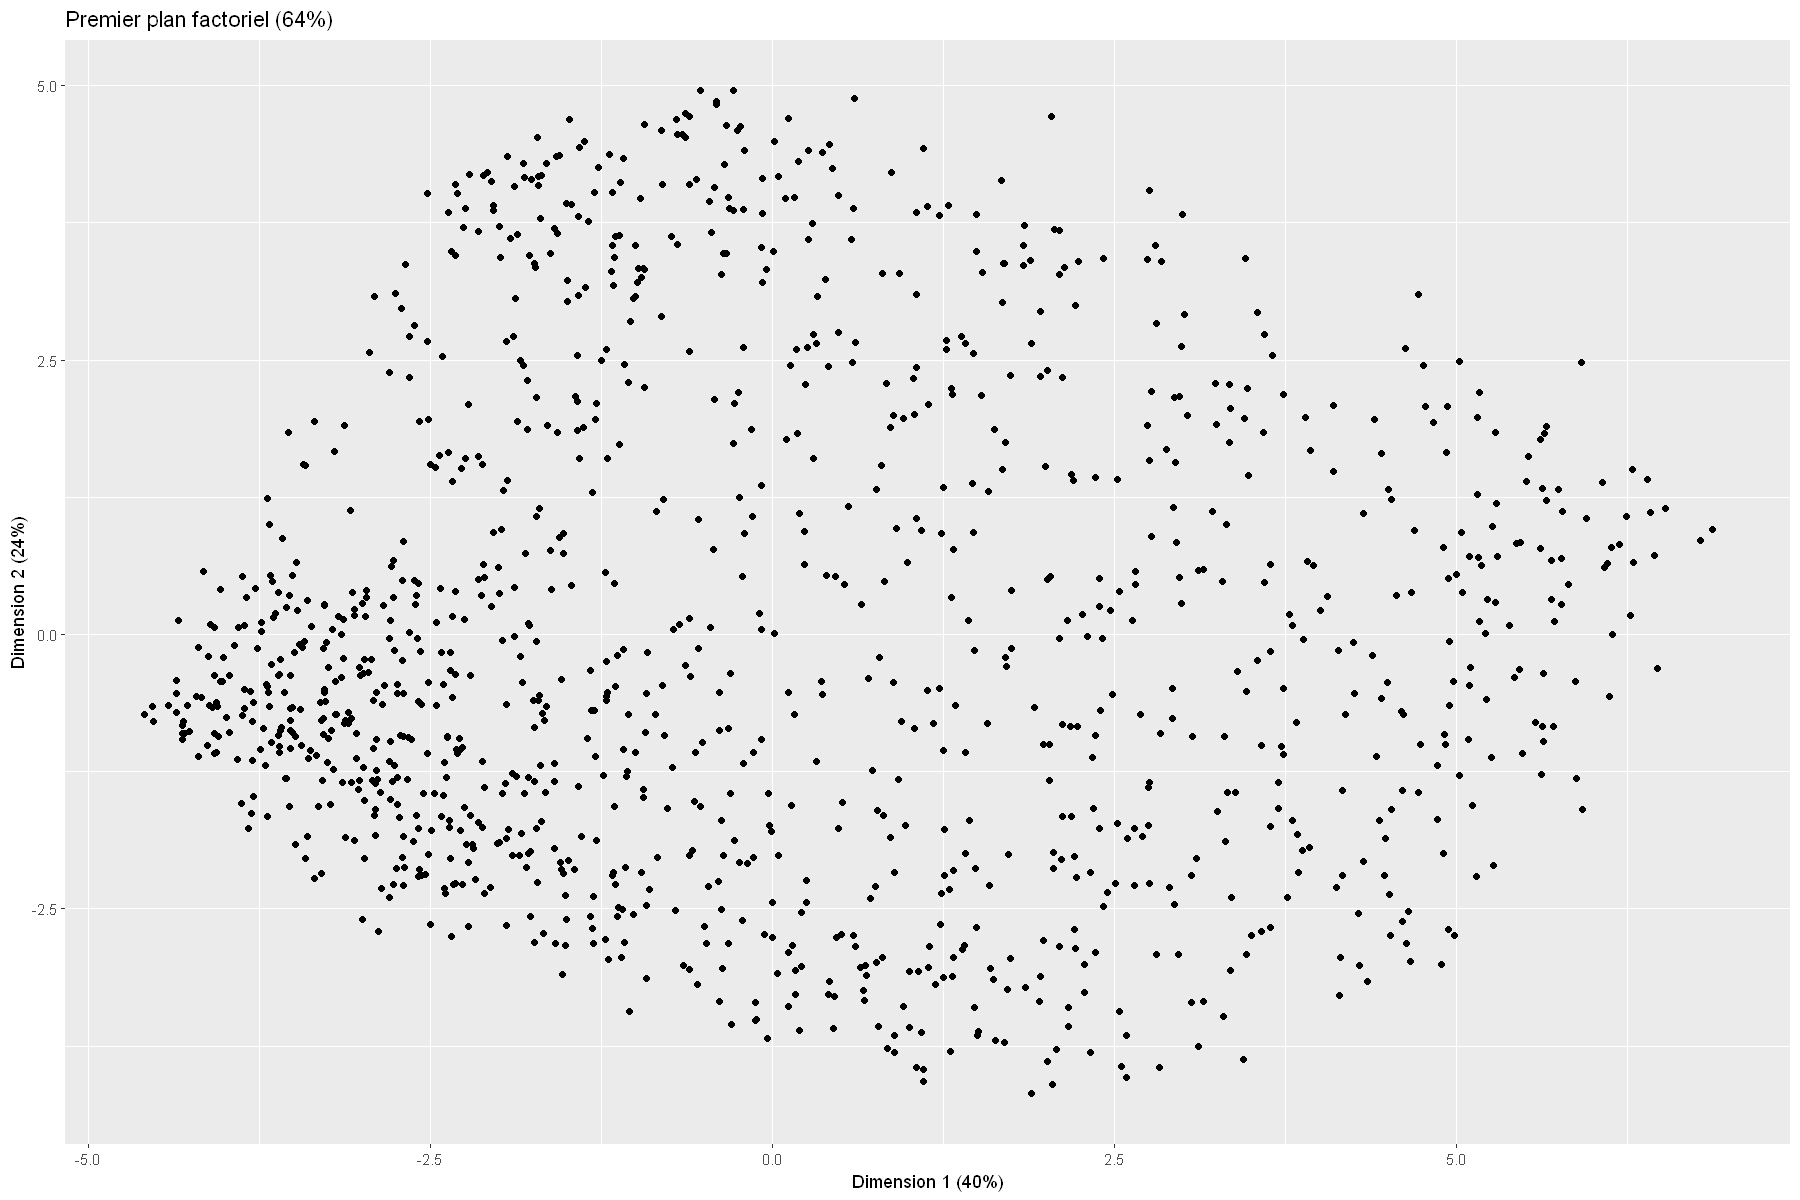

In [47]:
# Supposons que votre dataframe s'appelle loading_pca
# Utilisez la fonction ggplot() pour créer un nuage de points
ggplot(loading_pca, aes(x = Dim1, y = Dim2)) +
  geom_point() +
  labs(x = "Dimension 1 (40%)", y = "Dimension 2 (24%)", title = "Premier plan factoriel (64%)")


Interprétation : 

Il est maintenant possible de représenter les données sur le premier plan factoriel. Nous avons projeté le nuage des individus sur le premier plan factoriel, c’est-à-dire sur un plan composé des 2 premières composantes principales. Ici, on observe que : 

* Le premier axe (Dimension 1) explique 40% de la variance des données, et le deuxième axe (Dimension 2) en explique 24%. Ensemble, ils représentent 64% de la variance totale des données. Ceci indique que le premier plan factoriel donne une représentation assez informative des données, même si une part non négligeable de la variance reste non expliquée.
* Les points sont dispersés sur le graphe, ce qui suggère qu'il y a de la variabilité dans les données. Idéalement, pour une interprétation plus aisée, on aurait aimé voir des groupes de points distincts, ce qui indiquerait des clusters ou des regroupements naturels au sein des données.

Cependant, ce graphique n'est pas très pertienent et contient beaucoup d'informations supplémentaires qui ne peuvent pas êtres analysées correctement dans notre cas.  

* Bien que 64% ne soit pas un mauvais résultat, on pourrait espérer un pourcentage plus élevé pour une représentation fidèle des données.
* On remarque que les données sont uniformément dispersées et il n'y a pas de pattern visible de groupes ou de tendances. Cela peut indiquer que les deux principales composantes ne capturent pas bien les structures sous-jacentes.
    

## Mise en place d'hypothèses sur la signification des composantes principales

### Composante principale 1

On a choisi de conserver les 7 premières composantes principales de l'ACP afin de pouvoir expliquer 80% de la variance. Il est intéressant d'étudier la siagnification, ou ce que chacune des composantes principales pourrait représenter. 

Notre stratégie pour cette partie est la suivante : pour chaque composante principale conservée, nous récupérons les 5 indices des valeurs maximales pour cette composante, idemn pour les valeurs minimales. Suite à cela, nous utilisons ces indices pour récupérer et représenter l'évolution du taux de chargement moyen des stations correspondantes. A partir de nos observations dans cette étape nous émettons des conjectures sur la signification de chaque composante principale. Nous vérifierons nos hypothèses dans une partie ultérieure.

In [48]:
# On récupère les 5 valeurs min et max pour la première composante
max1 = order(-loading_pca$Dim1)[1:5] # on trie les indices dans l'ordre décroissant
min1= order(loading_pca$Dim1)[1:5]

cat("Indices des valeurs max:\n", max1, "\n---------\n")
cat("Indices des valeurs min:\n", min1, "\n")

a=c(max1,min1)

Indices des valeurs max:
 1107 978 441 363 403 
---------
Indices des valeurs min:
 997 85 905 1088 1133 


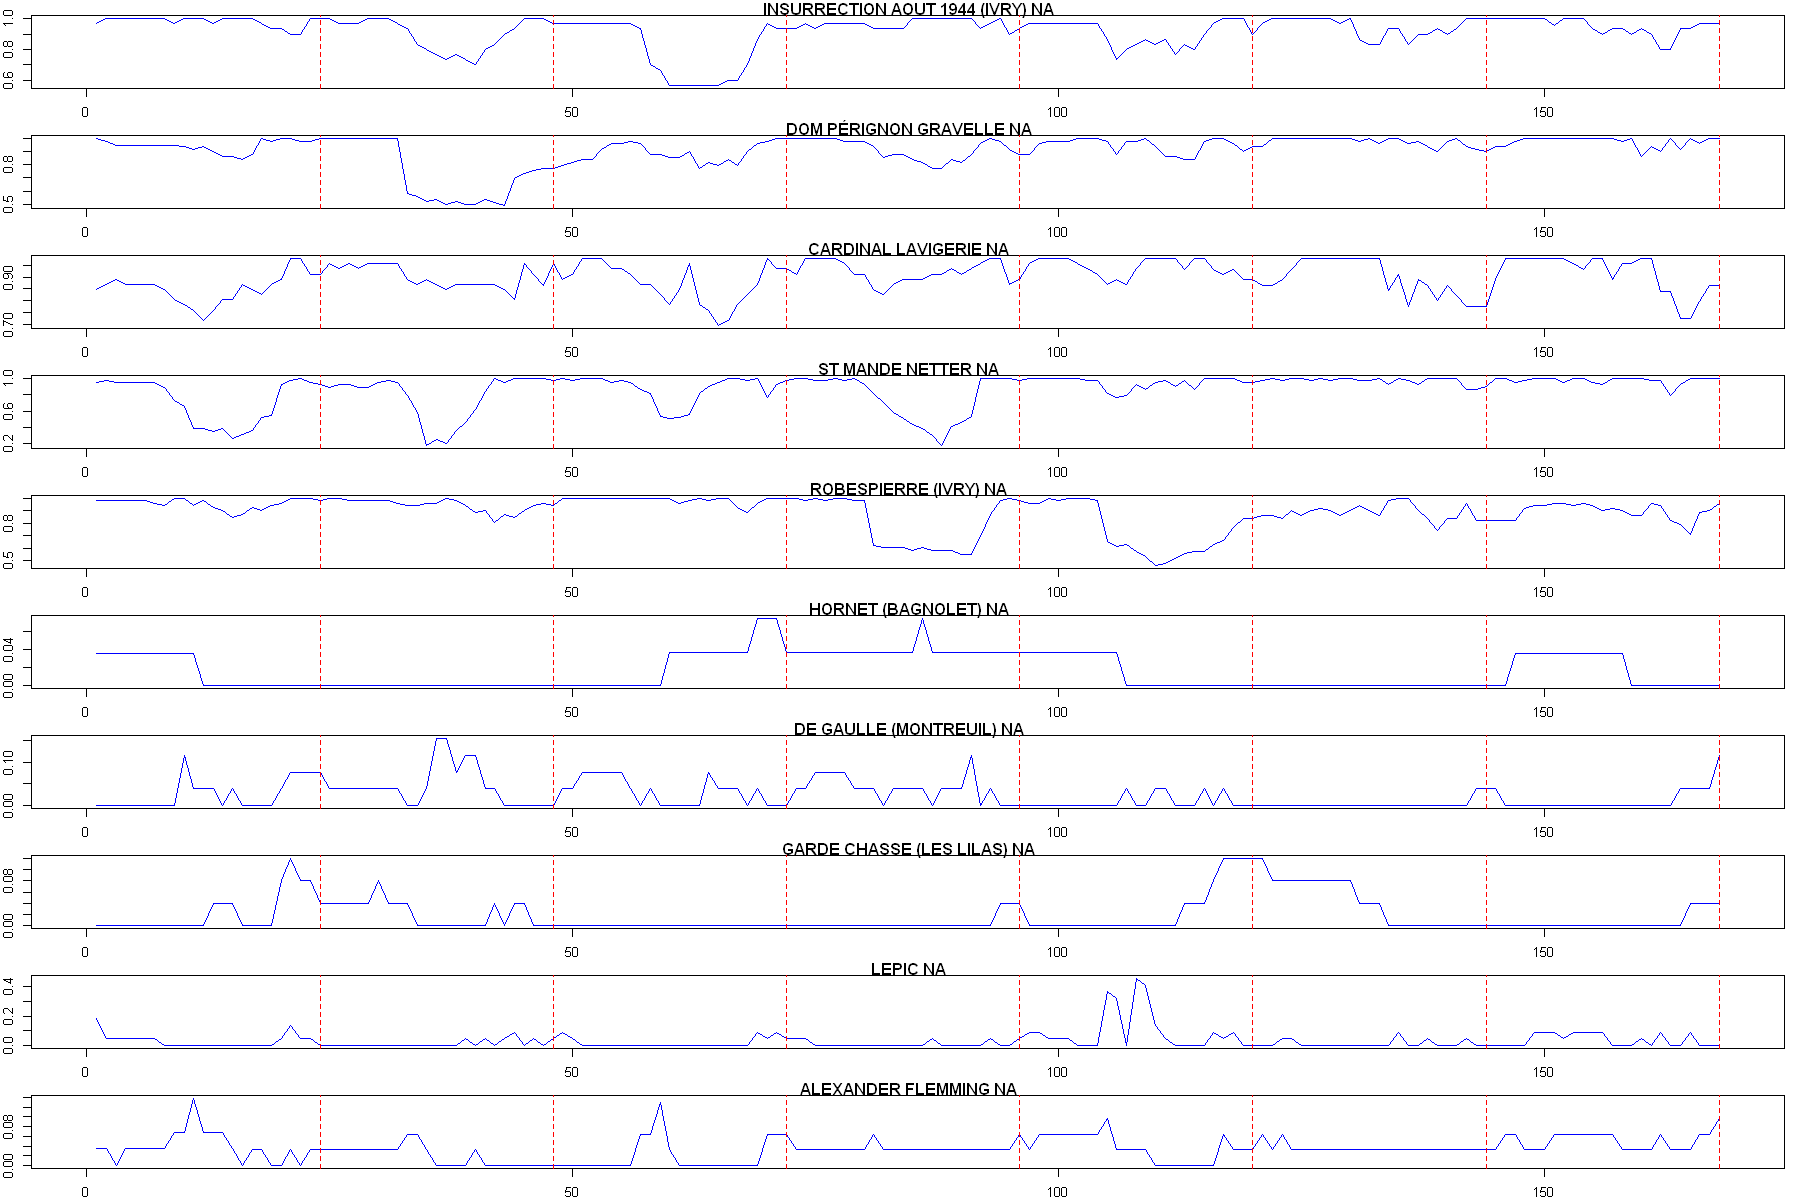

In [49]:
# Visualisation
par(mfrow = c(length(a), 1), mar = c(2, 2, 1, 1))

for (i in a) {
  dfi <- df[i, ]
  plot(loading[i, ], type = "l", col= "blue", main = paste(coord$names[i], a[i]))

# Ajout lignes verticales toutes les 24 heures
  abline(v = seq(24, length(loading[i, ]), by = 24), col = "red", lty = 2)
}
# Réinitialiser la disposition des graphiques à une seule colonne avec des marges normales
par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)


Interprétation : 
   * Les 4 graphes situés sur la première rangée représentent les 4 stations avec les taux de chargement les plus élevés. ces graphes ont été construits en récupérant les 4 plus grandes valeurs de la dimension 1 de notre ACP. 
   * De même, les 4 graphes de la seconde ligne sont ceux où les stations sont les plus déchargées, c'est à dire lorsque les vélos d'une station sont très utilisés. On a obtenu ces graphes en récupérant les valeurs les plus petite de la dimension 1. 

On pourrait émettre l'hypothèse que la première dimension porte l'information sur le taux de chargement des stations. Plus la dimension 1 est élevée, plus le chargement est important. A l'inverse, plus la dimension 1 est faible et plus la station est vide. On pourrait vérifier cette hypothèse en calculant le chargement moyen et en étudiant la corrélation avec la dimension 1.

### Composante principale 2

Nous allons maintenant procéder à la même analyse pour la deuxième composante.

In [ ]:
# On récupère les 5 valeurs min et max pour la composante composante
max2 = order(-loading_pca$Dim2)[1:5] # on trie les indices dans l'ordre décroissant
min2= order(loading_pca$Dim2)[1:5]

cat("Indices des valeurs max:\n", max2, "\n---------\n")
cat("Indices des valeurs min:\n", min2, "\n")

In [ ]:
b=c(max2,min2)
# Visualisation
par(mfrow = c(length(b), 1), mar = c(2, 2, 1, 1))

for (i in b) {
  dfi <- df[i, ]
  plot(loading[i, ], type = "l", col= "blue", main = paste(coord$names[i], a[i]))

# Ajout lignes verticales toutes les 24 heures
  abline(v = seq(24, length(loading[i, ]), by = 24), col = "red", lty = 2)
}
# Réinitialiser la disposition des graphiques à une seule colonne avec des marges normales
par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)

Interprétation : 

De manière analogue à l'analyse de la première composante, nous représentons ici l'évolution des taux de chargements des stations correspondants aux 5 indices max et 5 indices min que nous avons récupéré pour la deuxième composante. 

* On remarque sur la première ligne de graphiques que les pics correspondant aux valeurs maximales des taux de chargements pour chaque station se trouvent aux milieux des journées, alors que les pics les plus bas se trouvent lors des changements de jours (changements de dates). 
* Sur la deuxième ligne de graphiques, les observations sont inversées : les pics maxima se trouvent aux changements des jours et les pics correspondant aux minima sont au milieu de chaque journée. 

On peut supposer ici que la deuxième composante porte de l'information sur les stations qui sont plus remplies le jour que la nuit, et inversement. Une valeur élevée pour la deuxième composante indique que les stations ont un taux de remplissage faible la nuit et élevé la journée. Inversement, une faible valeur pour la deuxième composante pourrait indiquer que les taux de remplissage des stations sont faibles la journée et élevés la nuit. Cette hypoyhèse pourrait être vérifier à l'aide d'une variable présentant la différence de chargement entre le jour et la nuit. Il faudrait alors étudier l'évolution et les corrélations de cette variable. 

### Composante principale 3

Nous réitérons l'analyse avec la troisème composante.

In [ ]:
# On récupère les 5 valeurs min et max pour la troisième composante
max3 = order(-loading_pca$Dim3)[1:5] # on trie les indices dans l'ordre décroissant
min3= order(loading_pca$Dim3)[1:5]

cat("Indices des valeurs max:\n", max3, "\n---------\n")
cat("Indices des valeurs min:\n", min3, "\n")

In [ ]:
c=c(max3,min3)
# Visualisation
par(mfrow = c(length(c), 1), mar = c(2, 2, 1, 1))

for (i in c) {
  dfi <- df[i, ]
  plot(loading[i, ], type = "l", col= "blue", main = paste(coord$names[i], a[i]))

# Ajout lignes verticales toutes les 24 heures
  abline(v = seq(24, length(loading[i, ]), by = 24), col = "red", lty = 2)
}
# Réinitialiser la disposition des graphiques à une seule colonne avec des marges normales
par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)

Interprétation : 

Toujours dans la même démarche de celle de l'analyse des deux premières composantes, nous représentons ici l'évolution des taux de chargements des stations correspondants aux 5 indices max et 5 indices min que nous avons récupéré pour la troisième composante. 
* Sur les 5 dernières lignes, on a représenté les stations correspondant aux indices des 5 valeurs les plus élevées pour la dimension 3. On observe que le taux de chargement des stations sur cette ligne est globalement moyen à faible en semaine et élevé lors des week-ends. 
* Sur les 5 premières lignes, on a représenté les stations correspondant aux indices des 5 valeurs les plus faibles pour la dimension 3. On observe que le taux de chargement des stations sur cette ligne est globalement moyen à faible durant les week-ends et élevé en semaines. 

On peut faire la supposition que la troisème composante représente l'alternance entre jours travaillés et week-ends. Une valeur élevée pour la troisème dimension pourrait indiquer que les stations sont assez peu chargées en semaine et pleines durant les week-ends. Inversement, une faible valeur pour la dimension 3 pourrait signifier que les stations présentent de la disponibilité en semaine et sont plus sollicitées lors des week-ends. On pourrait étudier la véracité de cette hypothèse en créant une nouvelle variable et en procédant à une étude, comme présenté pour l'hypothèse sur la deuxième composante. function

### Composante principale 4

Nous réitérons l'analyse avec la quatrième composante.

In [ ]:
# On récupère les 5 valeurs min et max pour la quatrième composante
max4 = order(-loading_pca$Dim4)[1:5] # on trie les indices dans l'ordre décroissant
min4= order(loading_pca$Dim4)[1:5]

cat("Indices des valeurs max:\n", max4, "\n---------\n")
cat("Indices des valeurs min:\n", min4, "\n")

In [ ]:
d=c(max4,min4)
# Visualisation
par(mfrow = c(length(b), 1), mar = c(2, 2, 1, 1))

for (i in d) {
  dfi <- df[i, ]
  plot(loading[i, ], type = "l", col= "blue", main = paste(coord$names[i], a[i]))

# Ajout lignes verticales toutes les 24 heures
  abline(v = seq(24, length(loading[i, ]), by = 24), col = "red", lty = 2)
}
# Réinitialiser la disposition des graphiques à une seule colonne avec des marges normales
par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)

In [ ]:
# On va étudier les noms des stations en altitude, c'est-à-dire où la valeur dans la colonne 'bonus' vaut 1

bonus_stations = coord[coord$bonus == 1, ]
nom_station_recherche = 'VAUGIRARD'

# Remplacez 'nom_colonne' par le nom réel de la colonne qui contient les noms des stations dans votre dataframe
est_present = nom_station_recherche %in% bonus_stations$bonus

head(bonus_stations)


Interprétation : 

Nous avons cherché si toutes les stations présentes dans une même ligne du graphique étaient des stations en altitude. Cependant, les stations de la première colonne du graphique se situent en plaine. Cette hypothèse n'est pas possible. De plus, nous avons déjà émis des hypothèses sur le taux de chargement moyen, l'alternance entre le jour et la nuit et l'alternance entre jours travaillés et week-ends. Puisque la quatrième composante principale ne correspond pas forcément au fait qu'une station se trouve ou non en altitude, nous avons étudiés les significations principales possibles des composantes principales. Pour les dimensions supérieures ou égales à 4, il n'est pas forcément possible de trouver une signification correspondant à une caractéristique explicite sur nos données. 

Autre hypothèse possible pour la composante 4 (mais assez peu visible) : la présence de beaucoup de vélos en fin de journée ou pas ? A tester avec des corrélations.En effet, sur la première ligne du graphique, on remarque des pics de taux de chargement important en fin de journée, c'est à dire, proche du trait de séparation entre les jours de la semaine. Sur la deuxième ligne du graphique, ces mêmes pics sont visibles en milieu de journée, c'est à dire, entre deux traits de séparations entre les jours, même si leur intensité peut être plus faible. Pour vérifier cette hypothèse, nous pouvons créer une variable représentant le taux de chargement moyen en fin de journée et une autre en milieu de journée, puis étudier la corrélation avec la dimension 4.peu

### Composante principale 5

In [ ]:
# On récupère les 5 valeurs min et max pour la cinquième composante
max5 = order(-loading_pca$Dim5)[1:5] # on trie les indices dans l'ordre décroissant
min5= order(loading_pca$Dim5)[1:5]

cat("Indices des valeurs max:\n", max5, "\n---------\n")
cat("Indices des valeurs min:\n", min5, "\n")

In [ ]:
e=c(max5,min5)
# Visualisation
par(mfrow = c(length(e), 1), mar = c(2, 2, 1, 1))

for (i in e) {
  dfi <- df[i, ]
  plot(loading[i, ], type = "l", col= "blue", main = paste(coord$names[i], a[i]))

# Ajout lignes verticales toutes les 24 heures
  abline(v = seq(24, length(loading[i, ]), by = 24), col = "red", lty = 2)
}
# Réinitialiser la disposition des graphiques à une seule colonne avec des marges normales
par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)

Interprétation : 

Sur les 5 derniers graphiques, on remarque que le taux de chargement moyen des stations est plus important en début de semain qu'en fin de semaine,particulièrement les lundis et mardis. A l'inverse, sur les 5 premiers graphiques, les stations sont beaucoup moins chargées, voir vides sur ces mêmes jours. En fin de semaine, on remarque que les 5 dernières stations sont beaucoup moins remplies (particulièrement du mercredi au vendredi). A l'inverse, les 5 premières stations présente un taux de chargement moyen plus élevé sur ces mêmes jours. On peut donc émettre l'hypothèse que la 5ème composante représente l'alternance entre lundi/mardi et mercredi/jeudi/vendredi. 

Il se pourrait que du personnel de gestion des Velib vide certaines stations en cours de semaine et transporte les vélos vers des stations où l'affluence est plus importante enfin de semaine. 

Pour confirmer cette hypothèse, nous allons créer une variable représentant le taux de chargement moyen sur lundi/mardi et une autre sur mercredi/jeudi/vendredi et étudier la corrélation avec la 5ème composante. 

### Composante principale 6

In [ ]:
# On récupère les 5 valeurs min et max pour la sixième composante

max6 = order(-loading_pca$Dim6)[1:5] # on trie les indices dans l'ordre décroissant
min6= order(loading_pca$Dim6)[1:5]

cat("Indices des valeurs max:\n", max6, "\n---------\n")
cat("Indices des valeurs min:\n", min6, "\n")

In [ ]:
f=c(max6,min6)
# Visualisation
par(mfrow = c(length(f), 1), mar = c(2, 2, 1, 1))

for (i in f) {
  dfi <- df[i, ]
  plot(loading[i, ], type = "l", col= "blue", main = paste(coord$names[i], a[i]))

# Ajout lignes verticales toutes les 24 heures
  abline(v = seq(24, length(loading[i, ]), by = 24), col = "red", lty = 2)
}
# Réinitialiser la disposition des graphiques à une seule colonne avec des marges normales
par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)

Interprétation :

Il n'y a pas de tendance remarquable qui se dégage clairement comme c'était le cas pour les composantes principales. Il pourrait être judicieux de tester si cette composante pourrait représenter l'altitude. Une valeur élevée pourrait signifier une caractéristique vis-à-vis de l'altitude (station en altitude, ou l'inverse). Nous vérifierons cette hypothèse ultérieurement.


### Composante principale 7

In [ ]:
# On récupère les 5 valeurs min et max pour la septième composante

max7 = order(-loading_pca$Dim7)[1:5] # on trie les indices dans l'ordre décroissant
min7= order(loading_pca$Dim7)[1:5]

cat("Indices des valeurs max:\n", max7, "\n---------\n")
cat("Indices des valeurs min:\n", min7, "\n")

In [ ]:
g=c(max7,min7)
# Visualisation
par(mfrow = c(length(g), 1), mar = c(2, 2, 1, 1))

for (i in g) {
  dfi <- df[i, ]
  plot(loading[i, ], type = "l", col= "blue", main = paste(coord$names[i], a[i]))

# Ajout lignes verticales toutes les 24 heures
  abline(v = seq(24, length(loading[i, ]), by = 24), col = "red", lty = 2)
}
# Réinitialiser la disposition des graphiques à une seule colonne avec des marges normales
par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)

Interprétation :

On peut faire la même analyse que pour la sixième composante principale. Il n'y a pas de tendance remarquable qui se dégage clairement comme c'était le cas pour les composantes principales. Il pourrait être judicieux de tester si cette composante pourrait représenter l'altitude. Une valeur élevée pourrait signifier une caractéristique vis-à-vis de l'altitude (station en altitude, ou l'inverse). Nous vérifierons cette hypothèse ultérieurement.


### Test d'un éventuel lien avec l'altitude

Dans cette sous-partie nous allons tester un éventuel lien avec les dimensions de notre ACP et le caractère 'Bonus' lié à l'altitude.

In [ ]:
# Sélection des lignes correspondant aux stations en altitude
bonus_stations_indices = which(coord$bonus == 1) #on récupère les indices des stations en altitude
bonus_stations_PCA = loading_pca[bonus_stations_indices, ]

# Affichage des valeurs moyennes des stations en altitude sur chaque composante
print("Valeur moyenne des stations en altitude sur chaque composante :")
print(colMeans(bonus_stations_PCA))


In [ ]:
# On va étudier les noms des stations en altitude, c'est à dire où la valeur dans la colonne 'Bonus' vaut 1
bonus_stations <- coord[coord$bonus == 1, ]
indice_bonus <- which(coord$bonus == 1)

# Initialisation de la variable bonus_stations_PCA
bonus_stations_PCA <- NULL

# On récupère ensuite les valeurs de l'ACP pour les différentes composantes, et calculer les valeurs moyennes pour essayer de voir le lien avec l'altitude
for (i in indice_bonus) {
  bonus_stations_PCA <- rbind(bonus_stations_PCA, loading_pca[i, ])
}

# Affichage des valeurs moyennes des stations en altitude sur chaque composante
print("Valeur moyenne des stations en altitude sur chaque composante :")
print(colMeans(bonus_stations_PCA))




Interprétation :

Nous n'observons pas vraiment de lien avec les stations en altitude. Nous n'avons pas de résultat suffisant pour que ce soit une hypothèse importante. Il est possible que les zones en hauteurs soient moins peuplées et regroupent plus des quartiers de bureau/travail.


## 2.5 - Vérification des hypothèses

### 2.5.1 - Introduction de la méthode

Dans cette partie, nous allons introduire de nouvelles variables découlant des hypothèses sur la signification de nos composantes principales. L'objectif est de tester les corrélations entre les composantes retenues et les nouvelles variables introduites. Ainsi, nous pourrons valider, ou non, nos hypothèses. Pour ce faire, nous allons définir : 
* load_mean : Variable représentant le taux de chargement moyen pour l'hypothèse 1
* diff_jn : Variable représentant la différence de chargement moyen entre le jour et la nuit pour l'hypoyhèse 2
* diff_tw : Variable représentant la différence de chargement moyen entre les jours travaillés et les week-ends pour l'hypoyhèse 3
* diff_ms : Variable représentant la différence de chargement moyen entre le matin et l'après-midi et fin de journée pour l'hypothèse 4 
* diff_df : Variable représentant la différence de chargement moyen entre le début et la fin de la semaine pour l'hypothèse 5

Pour la variable jour/nuit, nous avons utilisé le graphique représentant la superposition de boxplots montrant l'évolution du chargement médian au cours de la semaine. On a étudié les temps marquant une rupture entre les moments du jour et de la nuit. Cette rupture est visible avec des pics plus bas observés sur les troisièmes quantiles des boxplots, et confirmée par les valeurs des médianes. Ainsi, on peut attribuer plage de jour entre 10h et 17h (ce qui cohérent avec les heures de bureau) et une plage de nuit entre 22h à 7h. Entre 18h et 22h, le chargement des stations est plus bas car la mobilité est importante sur ce créneau. Pour la variable matin/soir, nous avons observé de manière similaire un intervalle 6h-11h pour le matin, et 14h-24h pour le soir. Enfin pour la dernière hypothèse sur variable 5 : lundi-mardi contre mercredi-jeudi-vendredi.

In [55]:
# Définition des nouvelles variables
# ---------------------------------

# Chargement moyen 
# ---------------------------------
load_mean <- rowMeans(loading)

# Différence de chargement moyen entre le jour et la nuit
# ---------------------------------
# nuit : 22h-7h  (ou 21h-7h)  jour : 10h-17h

data_jour <- c()
for (i in 0:6) {
  data_jour <- c(data_jour, (10:17) + 24 * i)
}

data_nuit <- c()
for (i in 0:6) {
  data_nuit <- c(data_nuit, c(0:7, 22, 23) + 24 * i)
}

# Affichage pour vérification
#print(data_jour) OK!
#print(data_nuit) OK! 

In [112]:
#autre version 
# Calcul de la différence de chargement moyen entre le jour et la nuit
diff_jn <- rowMeans(loading[, data_jour]) - rowMeans(loading[, data_nuit])
head(diff_jn)

EURYALE DEHAYNIN            LEMERCIER      MEZIERES RENNES 
         -0.33782443          -0.67843640           0.03537069 
              FARMAN     QUAI DE LA RAPEE  CHOISY POINT D'IVRY 
          0.52641600           0.19469870          -0.24785329

In [114]:
# Différence de chargement moyen entre les jours travaillés et les week-ends
# ---------------------------------
# weekend : vendredi 20h -> dimanche 20h  semaine : lundi 10h -> vendredi 17h
data_weekend= c((4*24+20):(6*24+21))
data_week =c(10:(4*24+18))

# Supprimer le dernier élément de data_weekend
data_weekend <- head(data_weekend, -1)

# Supprimer le dernier élément de data_week
data_week <- head(data_week, -1)

#print(data_weekend)
#print(data_week)

diff_tw <- rowMeans(loading[, data_week]) - rowMeans(loading[, data_weekend])
head(diff_tw) # je n'ai pas la même chose que vous


 [1] 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
[20] 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
[39] 154 155 156 157 158 159 160 161 162 163 164


EURYALE DEHAYNIN            LEMERCIER      MEZIERES RENNES 
          0.05806167          -0.06786847          -0.05643193 
              FARMAN     QUAI DE LA RAPEE  CHOISY POINT D'IVRY 
         -0.02381017           0.18961745          -0.10899178

In [116]:
# Définition des plages horaires pour le matin et la fin de journée
# ---------------------------------
# matin : 6h-11h   fin journée : 14h-00h

# Matin : 6h-11h
data_matin <- c(sapply(0:6, function(i) (6 + 24*i):(11 + 24*i)))

data_soir <- c()  # initialisation du vecteur vide

for (i in 0:6) {
  data_soir = append(data_soir, (14 + 24*i):(23 + 24*i))
  data_soir = append(data_soir, 24*(i+1))
}
# Supprimer le dernier élément de data_weekend
data_matin <- head(data_matin, -1)

# Supprimer le dernier élément de data_week
data_soir <- head(data_soir, -1)   
                      
#print(data_matin) OK!
print(data_soir) #problème

 [1]  14  15  16  17  18  19  20  21  22  23  24  38  39  40  41  42  43  44  45
[20]  46  47  48  62  63  64  65  66  67  68  69  70  71  72  86  87  88  89  90
[39]  91  92  93  94  95  96 110 111 112 113 114 115 116 117 118 119 120 134 135
[58] 136 137 138 139 140 141 142 143 144 158 159 160 161 162 163 164 165 166 167


In [97]:
# Calcul de la différence de chargement moyen entre le matin et la fin de journée
diff_ms <- rowMeans(loading[, data_matin]) - rowMeans(loading[, data_soir])
head(diff_ms)


EURYALE DEHAYNIN            LEMERCIER      MEZIERES RENNES 
          0.03654785           0.23657890          -0.20877305 
              FARMAN     QUAI DE LA RAPEE  CHOISY POINT D'IVRY 
          0.03660739          -0.19103375           0.02687718

In [108]:
# Différence de chargement moyen entre début et fin de semaine
# ---------------------------------
# début : lundi et mardi    fin : mercredi-vendredi

data_debut <- c(0:47)
data_fin <- c(48:119)
#print(data_debut) OK! 
#print(data_fin) OK!
diff_df <- rowMeans(loading[, data_debut]) - rowMeans(loading[, data_fin])

# Affichage pour vérification
head(diff_df)


EURYALE DEHAYNIN            LEMERCIER      MEZIERES RENNES 
        -0.179768375         -0.086930825         -0.035684249 
              FARMAN     QUAI DE LA RAPEE  CHOISY POINT D'IVRY 
         0.256467934          0.142351678          0.004973319